<a href="https://colab.research.google.com/github/mch-fauzy/data-science/blob/main/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/01_Feature_Engineering_Variable_Types_%26_Characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **00. Source**

[feature-engineering-for-machine-learning](https://github.com/solegalli/feature-engineering-for-machine-learning)

---
---

# **01. Type of Variables**

A variable is any characteristic, number, or quantity 
that can be measured or counted. 

## **Numerical**

Peer to Peer Finance

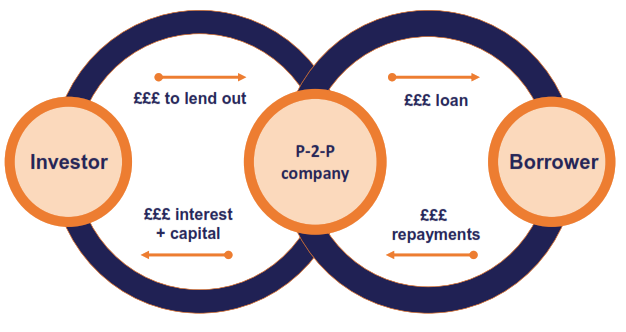

* Interest rate - continuous
* Number of accounts opened in last 12 months - discrete
* Loan defaulted - binary

### **Discrete**

A variable which values are whole numbers (counts) is called discrete. Examples:
* Number of items bought by a customer in a supermarket (10, 50, …)
* Number of active bank accounts of a borrower (1, 4, 7, ...)
* Number of pets in the family
* Number of children in the family

Number Opened Accounts

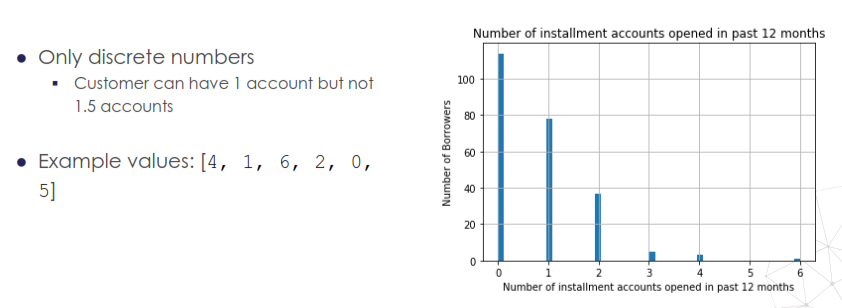

Loan Defaulted

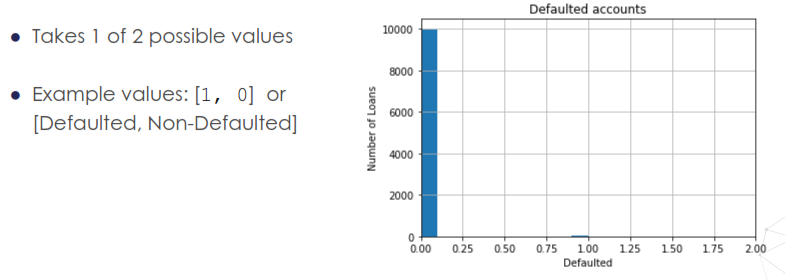

### **Continous**

A variable that may contain any value within some range is called
continuous. Examples:
* Amount paid by a customer in a supermarket ($32.50, $12, $5.20, …)
* House price (GBP 350,000, GBP 57000, GBP 1,000,000, ...)
* Time spent surfing a website (3.4 seconds, 5.10 seconds, ...)
* Total debt as percentage of total income in the last month (0.2, 0.001, 0, 0.75, ...)

Interest Rate

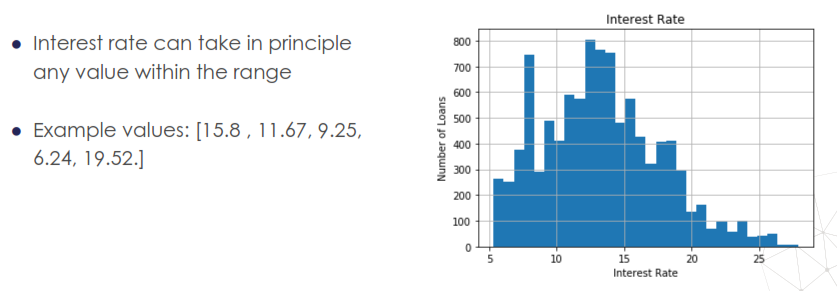

---

## **Categorical**

The values of a categorical variable are selected from a group 
of categories, also called labels. Examples:
* Marital status (married, single, …)
* Intended use of loan (debt-consolidation, car purchase, ...)
* Mobile network provider (Vodafone, Orange, ...)
* Gender (male, female)

### **Ordinal**

Categorical variables in which categories can be `meaningfully ordered` are called ordinal. Examples:
* Student's grade in an exam (A, B, C or Fail)
* Days of the week (Monday = 1 and Sunday = 7)
* Educational level, with the categories: Elementary school,  High school, College graduate and PhD ranked from 1 to 4)

### **Nominal**

Show `no intrinsic order` of the labels. Examples:
* Country of birth (Argentina, England, Germany)
* Postcode
* Vehicle make (Citroen, Peugeot, ...)

Home Ownership

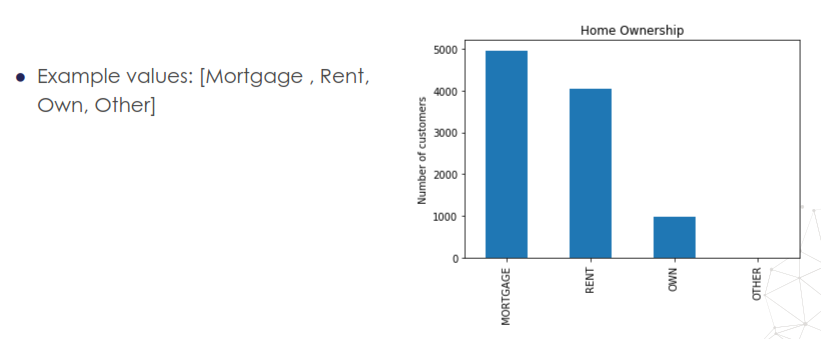


The majority of the borrowers either own their house on a mortgage or rent their property. A few borrowers own their home completely.

Loan Purpose

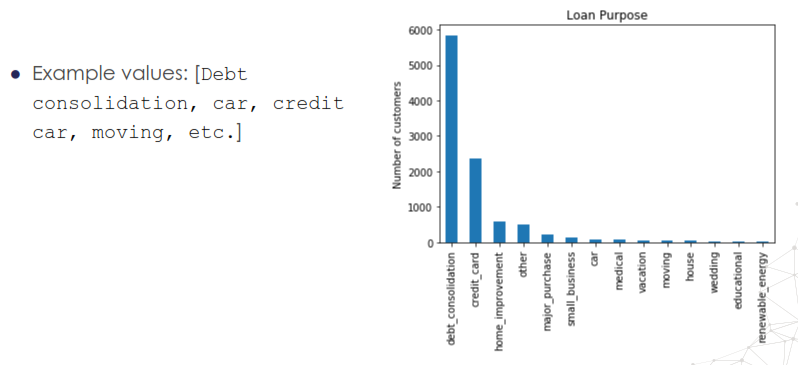

The majority of the borrowers intend to use the loan for `'debt consolidation'`. This is quite common. What the borrowers intend to do is, to consolidate all the debt that they have on different financial items, in one single debt, the new loan that they will take from the peer to peer company. This loan will usually provide an advantage to the borrower, either in the form of lower interest rates than a credit card, for example, or longer repayment period.

---

## **Date and Time Variables**

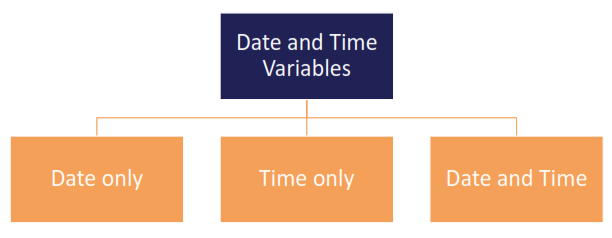

Date and time, or datetime variables they take dates and / or time as values.
* Date of birth ('29-08-1987', '12-01-2012')
* Date of application ('2016-Dec', '2013-March')
* Time of accident (12:20:45)
* Payment date ('29-08-1987 15:20.20‘)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:

# let's load the dataset

# Variable definitions:
#-------------------------
# disbursed amount: loan amount lent to the borrower
# market: risk band in which borrowers are placed
# loan purpose: intended use of the loan
# date_issued: date the loan was issued
# date_last_payment: date of last payment towards repyaing the loan

data = pd.read_csv('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/loan.csv')

data.head()

customer_id  disbursed_amount  ...  date_last_payment number_credit_lines_12
0            0           23201.5  ...         2016-01-14                    NaN
1            1            7425.0  ...         2016-01-25                    NaN
2            2           11150.0  ...         2014-09-26                    NaN
3            3            7600.0  ...         2016-01-26                    NaN
4            4           31960.0  ...         2016-01-11                    NaN

[5 rows x 14 columns]

In [ ]:
# pandas assigns type 'object' when reading dates
# and considers them strings.
# Let's have a look

data[['date_issued', 'date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [ ]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards

data['date_issued_dt'] = pd.to_datetime(data['date_issued']) # format yyyy-mm-dd
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment']) # format yyyy-mm-dd

data[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head()

date_issued date_issued_dt date_last_payment date_last_payment_dt
0  2013-06-11     2013-06-11        2016-01-14           2016-01-14
1  2014-05-08     2014-05-08        2016-01-25           2016-01-25
2  2013-10-26     2013-10-26        2014-09-26           2014-09-26
3  2015-08-20     2015-08-20        2016-01-26           2016-01-26
4  2014-07-22     2014-07-22        2016-01-11           2016-01-11

In [ ]:
# let's extract the month and the year from the variable date
# to make nicer plots

# more on this in section 12 of the course

data['month'] = data['date_issued_dt'].dt.month
data['year'] = data['date_issued_dt'].dt.year

In [ ]:
data = data.groupby(['year','month', 'market'])['disbursed_amount'].sum().unstack() # unstack market to columns

In [ ]:
data.head()

market           A       B   C   D         E
year month                                  
2007 7      1820.0     NaN NaN NaN       NaN
     8         NaN     NaN NaN NaN  18600.00
     9         NaN     NaN NaN NaN  19432.25
     10        NaN     NaN NaN NaN  14256.00
     12        NaN  2796.5 NaN NaN       NaN

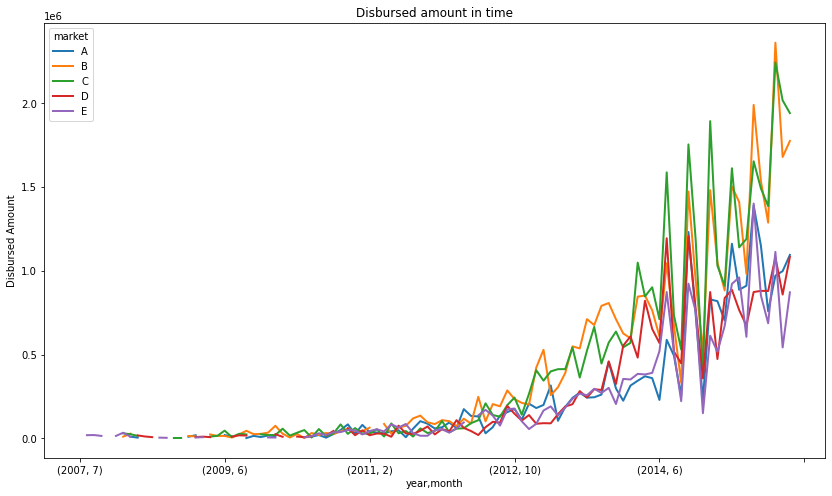

In [ ]:
# let's see how much money Lending has disbursed
# (i.e., lent) over the years to the different risk
# markets (grade variable)

fig = data.plot(figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount');


This toy finance company seems to have increased the amount of money lent from 2012 onwards. The tendency indicates that they continue to grow. In addition, we can see that their major business comes from lending money to C and B grades.

'A' grades are the lower risk borrowers, borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are charged lower interest rates.

D and E grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.

---

## **Mixed Variables** 📍

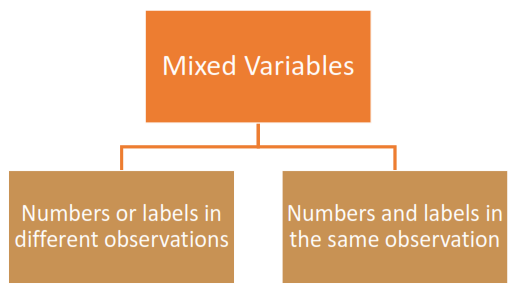

Mixed variables are those which values contain both numbers and labels.

Variables can be mixed for a variety of reasons. For example, when credit agencies gather and store financial information of users, usually, the values of the variables they store are numbers. However, in some cases the credit agencies cannot retrieve information for a certain user for different reasons. What Credit Agencies do in these situations is to code each different reason due to which they failed to retrieve information with a different code or 'label'. Like this, they generate mixed type variables. These variables contain numbers when the value could be retrieved, or labels otherwise.

As an example, think of the variable `number_of_open_accounts`. It can take any number, representing the number of different financial accounts of the borrower. Sometimes, information may not be available for a certain borrower, for a variety of reasons. Each reason will be coded by a different letter, for example: 

* 'A': couldn't identify the person, 
* 'B': no relevant data, 
* 'C': person seems not to have any open account.

Another example of mixed type variables, is for example the variable `missed_payment_status`. This variable indicates, whether a borrower has missed a (any) payment in their financial item. For example, if the borrower has a credit card, this variable indicates whether they missed a monthly payment on it. Therefore, this variable can take values of 0, 1, 2, 3 meaning that the customer has missed 0-3 payments in their account. And it can also take the value D, if the customer defaulted on that account.

> Typically, once the customer has missed 3 payments, the lender declares the item defaulted (D), that is why this variable takes numerical values 0-3 and then D.

Observations `show either numbers or categories` among their
values
* Number of credit accounts (1-100, U, T, M)
* U = unknown, T = unverified, M = unmatched)
* Number of missed payments (1-3, D, A)
* D = defaulted, A = arrangements

Observations `show both numbers and categories` in their values
* Cabin (Titanic) (A15, B18, …)
* Ticket (Titanic ) (A103349)
* Vehicle registration (AB500)
* Postcode (SE18)

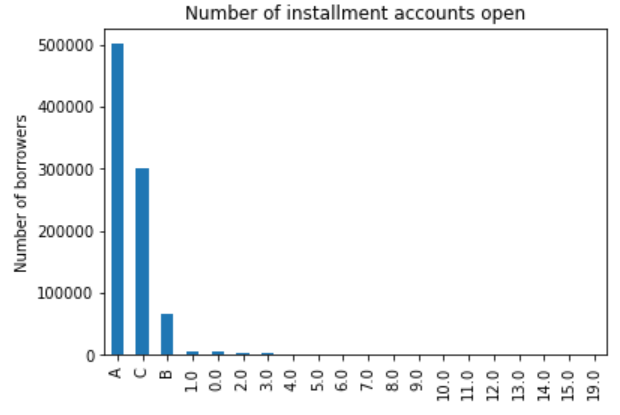

This is how a mixed variable looks like

---
---

# **02. Variable Characteristics**

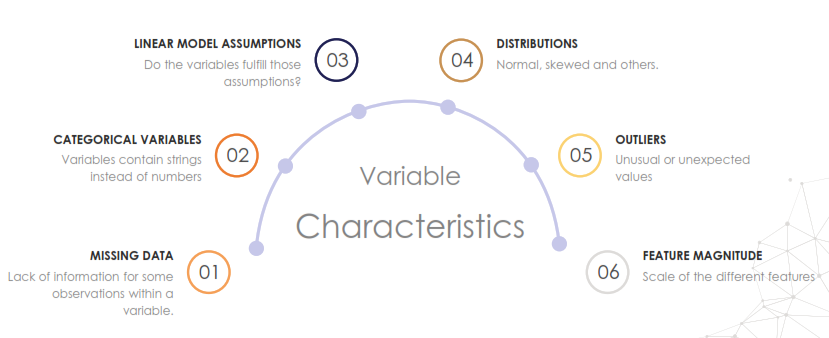

**Resources Link:**

>[Identifying common Data Mining Mistakes by SAS](https://www.mwsug.org/proceedings/2007/saspres/MWSUG-2007-SAS01.pdf)

## **Missing Values** 📍

* Missing data, or missing values, occur when no data / no value is stored for certain observations within a variable.

* Incomplete data is an unavoidable problem in most data sources.

* Can have a significant impact on the conclusions that can be drawn from the data.

Causes of missing data:

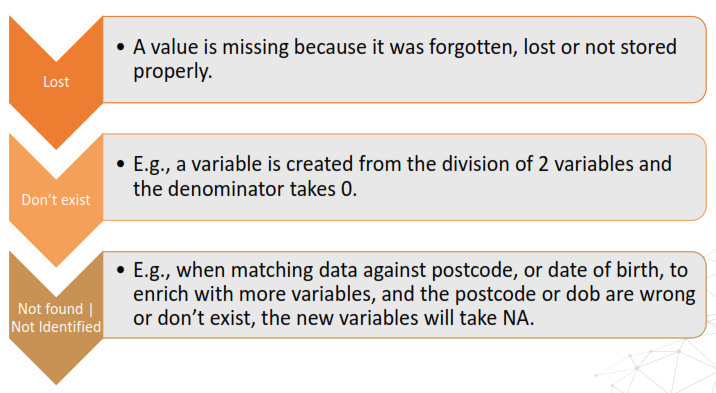



---


***Why is data missing?***


The source of missing data can be very different. These are just a few examples:

> A value is missing because it `was forgotten, lost or not stored properly`. For a certain observation, the value does not exist. The value can't be known or identified
In many organisations, information is collected into a form by a person talking with a client on the phone, or alternatively, by customers filling forms online. Often, the `person` entering the data `does not complete all the fields` in the form. Many of the fields are `not compulsory`, which may lead to `missing values`.

> The reasons for omitting the information can vary: perhaps the person `does not want to disclose` some information, for example income, or they `do not know the answer`, or the `answer is not applicable` for a certain circumstance, or on the contrary, the person in the organisation wants to spare the customer some time, and therefore omits asking questions they think are not so relevant.

> There are other cases where the value for a certain variable does not exist. For example, in the variable 'total debt as percentage of total income' (very common in financial data), if the person has `no income`, then the total percentage of 0 does not exist, and therefore it will be a `missing value`.

Depending on the mechanism, we may choose to process the missing values differently. In addition, by knowing the source of missing data, we may choose to take action to control that source and `decrease the amount of missing information` looking forward `during data collection`.

**Resources Link:**

>[Missing data imputation, chapter 25](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to display the total number columns present in the dataset
#pd.set_option('display.max_columns', None)

In [ ]:
# let's load the titanic dataset
data = pd.read_csv('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/titanic.csv')

# let's inspect the first 5 rows
data.head()

pclass  survived  ...   body                        home.dest
0       1         1  ...    NaN                     St Louis, MO
1       1         1  ...    NaN  Montreal, PQ / Chesterville, ON
2       1         0  ...    NaN  Montreal, PQ / Chesterville, ON
3       1         0  ...  135.0  Montreal, PQ / Chesterville, ON
4       1         0  ...    NaN  Montreal, PQ / Chesterville, ON

[5 rows x 14 columns]

In python, the missing values are stored as NaN, see for example the first row for the variable body.

In [ ]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe

data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
# visualise the percentage of missing values for each variable

data.isnull().sum()/len(data)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

### **Missing data Not At Random (MNAR): Systematic missing values**

Missing Not at Random, MNAR:

  >Missing data is not at random (MNAR) when there is a mechanism or a reason why missing values are `introduced` in the dataset. For example, `MNAR would occur if people failed to fill in a depression survey because of their level of depression`. Here, the `missing of data is related to the outcome`, depression. Similarly, when a financial company asks for bank and identity documents from customers in order to prevent identity fraud, typically, `fraudsters impersonating` someone else `will not upload documents`, because they don't have them, because they are fraudsters. Therefore, there is a `systematic relationship between the missing documents and the target we want to predict`: fraud.



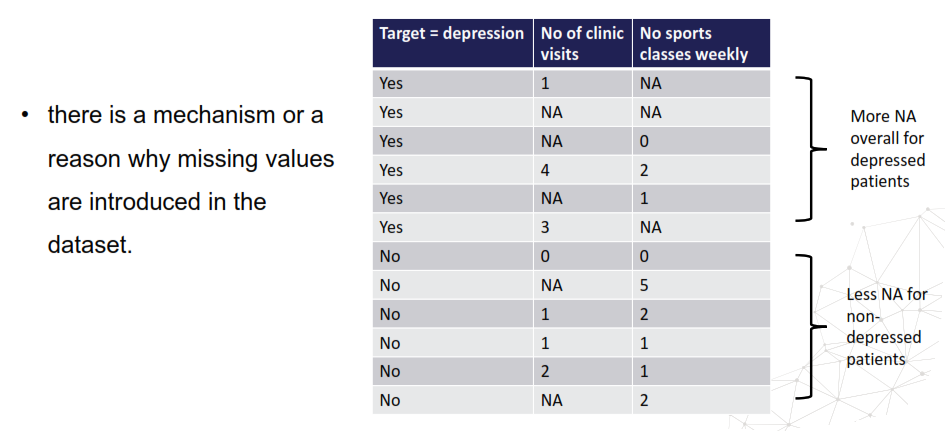

In the Titanic dataset, both the `missing values` of the variables `age and cabin`, were introduced systematically. For many of the people who did not survive, the age they had or the cabin they were traveling in, could not be established. The people who survived could be otherwise asked for that information.

Can we infer this by looking at the data?

In a situation like this, we could expect a greater number of missing values for people who did not survive.

In [ ]:
# let's create a binary variable that indicates whether the value of cabin is missing

#data['cabin_null'] = np.where(data['cabin'].isnull(), 1, 0) # jika True = 1

In [ ]:
# let's evaluate the percentage of missing values in cabin for the people who survived vs the non-survivors.
# the variable Survived takes the value 1 if the passenger survived, or 0 otherwise
# group data by Survived vs Non-Survived and find the percentage of nulls for cabin

#data.groupby(['survived'])['cabin_null'].mean()

# or

data['cabin'].isnull().groupby(data['survived']).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

We observe that the percentage of missing values is higher for people who did not survive (87%), respect to people who survived (60%). This finding is aligned with our hypothesis that the `data is missing because after people died, the information could not be retrieved`.

Note: Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us build assumptions.

In [ ]:
# Let's do the same for the variable age:
# First we create a binary variable to indicates whether the value of Age is missing

#data['age_null'] = np.where(data['age'].isnull(), 1, 0) # jika True = 1

# and then look at the mean in the different survival groups:
#data.groupby(['survived'])['age_null'].mean()

# or

data['age'].isnull().groupby(data['survived']).mean()

survived
0    0.234858
1    0.146000
Name: age, dtype: float64

Again, we observe a higher number of missing data for the people who did not survive the tragedy. The analysis therefore suggests that there is a systematic loss of data: `people who did not survive tend to have more missing information`. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.

> Jadi, mayoritas nilai pada kolom untuk target yang sama (0 misalnya) cenderung lebih banyak **Missing Data** daripada target lainnya (1)

### **Missing data Completely At Random (MCAR)**

Missing Completely at Random, MCAR:

  >A variable is missing completely at random (MCAR) if the `probability of being missing is the same for all the observations`. When data is MCAR, there is absolutely `no relationship` between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is `nothing systematic going on` that makes some data more likely to be missing than other. If values for observations are missing completely at random, then `disregarding those cases would not bias` the inferences made.

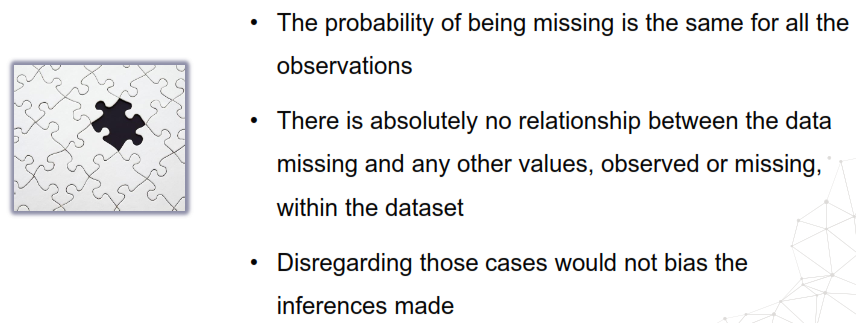

In [ ]:
# In the titanic dataset, there are also missing values for the variable Embarked.

# Let's slice the dataframe to show only the observations with missing values for Embarked

data[data['embarked'].isnull()]

pclass  survived  ...       home.dest age_null
168       1         1  ...             NaN        0
284       1         1  ...  Cincinatti, OH        0

[2 rows x 15 columns]

These 2 women were traveling together, Miss Icard was the maid of Mrs Stone.

A priori, there `does not` seem to be an indication that the missing information in the variable `Embarked is depending on any other variable`, and the fact that these women survived, means that they could have been asked for this information.

`Very likely` the values were lost at the time of building the dataset.

If these values are MCAR, the `probability` of data being missing for these 2 women is the `same` as the `probability for values to missing for any other person` on the titanic. Of course this will be hard, if possible at all, to prove.

### **Missing data at Random (MAR)**

Missing at Random, MAR:

  >MAR occurs when there is a `relationship between the propensity of missing values and the observed data`. In other words, the `probability of an observation being missing depends on available information` (i.e., other variables in the dataset). For example, if men are more likely to `disclose their weight` than women, weight is MAR. The weight information will be missing at random for those men and women who do not disclose their weight, but as men are more prone to disclose it, there will be `more missing values for women than for men`.

In a situation like the above, if we `decide to proceed with the variable with missing values` (in this case weight), we might `benefit from including gender to control the bias in weight` for the missing observations.



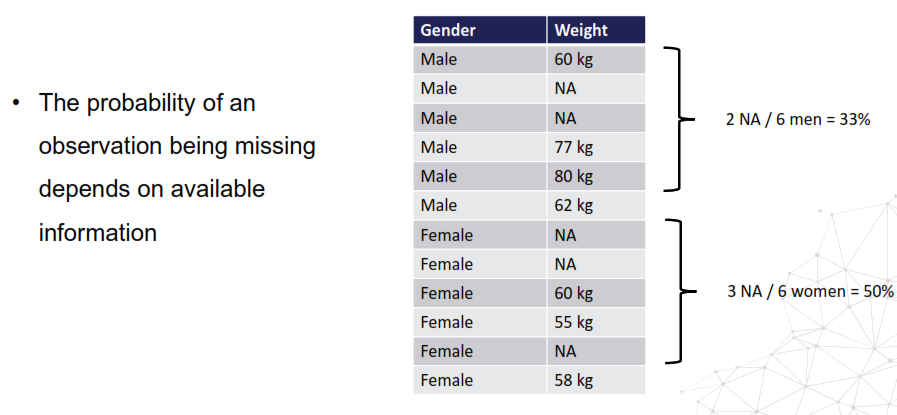

We will look at the variables employment and years in employment, both declared by the borrowers at the time of applying for a loan.

In this example, data missing in employment are associated with data missing in time in employment.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/loan.csv', 
                   usecols=['employment', 'time_employed'])

data.head()

employment time_employed
0       Teacher     <=5 years
1    Accountant     <=5 years
2  Statistician     <=5 years
3         Other     <=5 years
4    Bus driver      >5 years

In [ ]:
# let's check the percentage of missing data

data.isnull().mean()

employment       0.0611
time_employed    0.0529
dtype: float64

We see that both variables have the same percentage of missing observations roughly.

In [ ]:
# number of different employments
print('Number of employments: {}'.format(len(data['employment'].unique())))

# Examples of employments
data['employment'].unique()

Number of employments: 12


array(['Teacher', 'Accountant', 'Statistician', 'Other', 'Bus driver',
       'Secretary', 'Software developer', 'Nurse', 'Taxi driver', nan,
       'Civil Servant', 'Dentist'], dtype=object)

We observe the missing information (nan), and several different employments of the people.

In [ ]:
# let's inspect the variable time employed

data['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

The customer `can't enter a value` for employment time if they are `not employed`. They could be students, retired, self-employed, or work in the house. But we see how these 2 variables are related to each other.

In [ ]:
# let's calculate the proportion of missing data for the time_employed variable for customers who declared employment

# customers who declared employment (select data whose employment is not null)
employed = data[~data['employment'].isnull()]

# percentage of missing data in time employed
employed['time_employed'].isnull().mean() # missing data in customer who is employed

0.0005325380764724678

In [ ]:
# let's do the same for those bororwers who did not report employment

# customers who did not declare employment
not_employed = data[data['employment'].isnull()]

# percentage of missing data in time employed
not_employed['time_employed'].isnull().mean()

0.8576104746317512

The number of `borrowers who have reported occupation` and have `missing values` in time_employed is `minimal`. Whereas the `customers who did not report an occupation or employment`, are` mostly reporting missing values` in the time_employed variable

This further supports that the missing values in employment are `related` to the missing values in time_employed.

This is an example of MAR.

---

## **Cardinality** 📍

The values of a categorical variable are selected from a group of categories, also called labels. For example, in the variable gender the categories or labels are male and female, whereas in the variable city the labels can be London, Manchester, Brighton and so on.

Different categorical variables contain different number of labels or categories. The variable gender contains only 2 labels, but a variable like city or postcode, can contain a huge number of different labels.

The `number of different labels (unique label)` within a categorical variable is known as `cardinality`. A `high number of labels` within a variable is known as `high cardinality`.

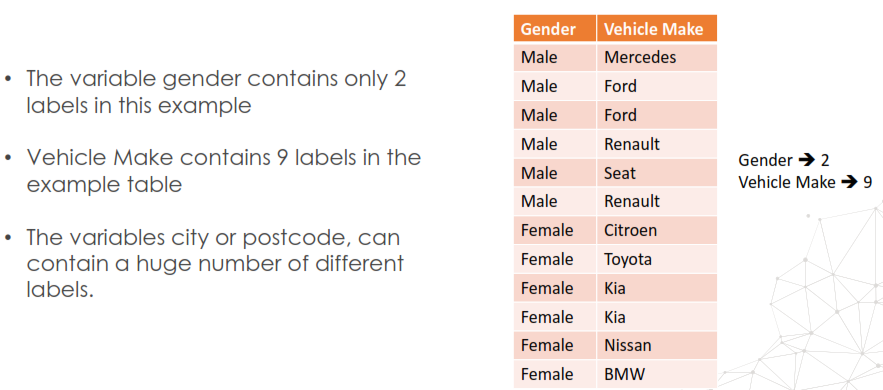

**Are multiple labels in a categorical variable a problem?**


---


High cardinality may pose the following problems:

* Variables with `too many labels` tend to `dominate over` those with only a `few labels`, particularly in `Tree based` algorithms.

* A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models prone to `over-fit`.

* Some of the labels may `only be present` in the training data set, but not in the test set, therefore machine learning algorithms may `over-fit` to the training set.

* Contrarily, some labels may `appear only` in the test set, therefore leaving the machine learning algorithms `unable to perform` a calculation over the new (unseen) observation.

In particular, `tree methods` can be `biased` towards variables with `lots of labels (variables with high cardinality)`. Thus, `their performance` may be `affected` by high cardinality.



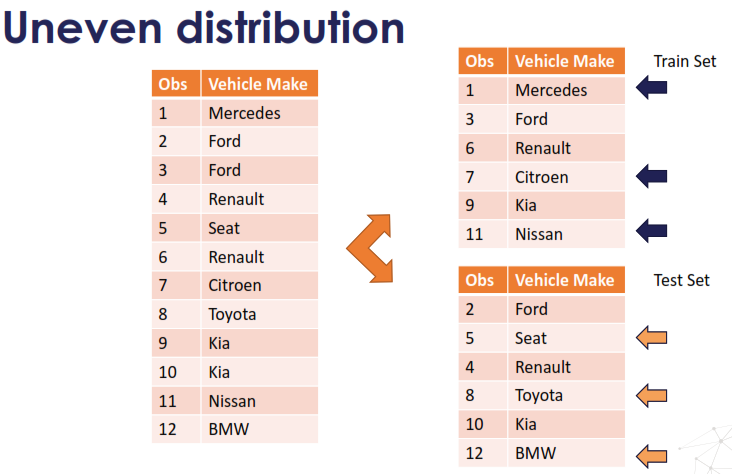

Below, we will show the effect of high cardinality of variables on the performance of different machine learning algorithms, and how a quick fix to reduce the number of labels, without any sort of data insight, already helps to boost performance.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to build machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

# to evaluate the models
from sklearn.metrics import roc_auc_score

# to separate data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# let's load the titanic dataset
data = pd.read_csv('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/titanic.csv')

# let's inspect the first 5 rows
data.head()

pclass  survived  ...   body                        home.dest
0       1         1  ...    NaN                     St Louis, MO
1       1         1  ...    NaN  Montreal, PQ / Chesterville, ON
2       1         0  ...    NaN  Montreal, PQ / Chesterville, ON
3       1         0  ...  135.0  Montreal, PQ / Chesterville, ON
4       1         0  ...    NaN  Montreal, PQ / Chesterville, ON

[5 rows x 14 columns]

The categorical variables in this dataset are Name, Sex, Ticket, Cabin and Embarked.

Note: that Ticket and Cabin contain both letters and numbers, so they could be treated as Mixed Variables.

In [ ]:
# let's inspect the cardinality, this is the number
# of different labels, for the different categorical variables

print('Number of categories in the variable Name: {}'.format(len(data.name.unique())))

print('Number of categories in the variable Gender: {}'.format(len(data.sex.unique())))

print('Number of categories in the variable Ticket: {}'.format(len(data.ticket.unique())))

print('Number of categories in the variable Cabin: {}'.format(len(data.cabin.unique())))

print('Number of categories in the variable Embarked: {}'.format(len(data.embarked.unique())))

print('Total number of passengers in the Titanic: {}'.format(len(data)))

Number of categories in the variable Name: 1307
Number of categories in the variable Gender: 2
Number of categories in the variable Ticket: 929
Number of categories in the variable Cabin: 182
Number of categories in the variable Embarked: 4
Total number of passengers in the Titanic: 1309


While the variable Sex contains only 2 categories and Embarked 4 (low cardinality), the variables Ticket, Name and Cabin, as expected, contain a huge number of different labels (high cardinality).



---


To demonstrate the `effect of high cardinality` in `train and test sets` and `machine learning performance`, We will work with the variable `Cabin`. I will create a new variable with reduced cardinality.

In [ ]:
# we know from the previous cell that there are 148 different cabins, therefore the variable
# is highly cardinal

data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


Let's now reduce the cardinality of the variable. How? instead of using the entire cabin value, We will capture only the first letter.

Rationale: the `first letter indicates the deck on which the cabin was located`, and is therefore an indication of both social class status and proximity to the surface of the Titanic. Both are known to improve the probability of survival.

In [ ]:
# let's capture the first letter of Cabin
data['cabin_reduced'] = data['cabin'].astype(str).str[0]

data[['cabin', 'cabin_reduced']].head()

cabin cabin_reduced
0    B5             B
1   C22             C
2   C22             C
3   C22             C
4   C22             C

In [ ]:
print('Number of categories in the variable Cabin: {}'.format(len(data.cabin.unique())))

print('Number of categories in the variable Cabin reduced: {}'.format(len(data.cabin_reduced.unique())))

Number of categories in the variable Cabin: 182
Number of categories in the variable Cabin reduced: 9


We reduced the number of different labels from 182 to 9.

### **High cardinality leads to uneven distribution of categories in train and test sets**

When a variable is highly cardinal, often some categories land only on the training set, or only on the testing set. If present only in the training set, they may lead to over-fitting. If present only on the testing set, the machine learning algorithm will not know how to handle them, as it has not seen them during training.

In [ ]:
# let's separate into training and testing set
# in order to build machine learning models

use_cols = ['cabin', 'cabin_reduced', 'sex']

# this functions comes from scikit-learn
X_train, X_test, y_train, y_test = train_test_split(data[use_cols], 
                                                    data['survived'],  
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [ ]:
# Let's find out labels present only in the training set

unique_to_train_set = [
    x for x in X_train.cabin.unique() if x not in X_test.cabin.unique()
]

len(unique_to_train_set)

113

or

In [ ]:
unique_to_train_set = []

for x in X_train['cabin'].unique():
  if x not in X_test['cabin'].unique():
    unique_to_train_set.append(x)

print(len(unique_to_train_set))

113


There are 113 Cabins only present in the training set, and not in the testing set.

In [ ]:
# Let's find out labels present only in the test set

unique_to_test_set = [
    x for x in X_test.cabin.unique() if x not in X_train.cabin.unique()
]

len(unique_to_test_set)

36

or

In [ ]:
unique_to_test_set = []

for x in X_test['cabin'].unique():
  if x not in X_train['cabin'].unique():
    unique_to_test_set.append(x)

print(len(unique_to_test_set))

36


There are 36 Cabins only present in the test set, and not in the training set.

Variables with high cardinality tend to have values (i.e., categories) present in the training set, that are not present in the test set, and vice versa. 

This will bring problems at the time of training (due to over-fitting) and scoring of new data (how should the model deal with unseen categories?).

In [ ]:
# Let's find out labels present only in the training set
# for Cabin with reduced cardinality

unique_to_train_set = [
    x for x in X_train['cabin_reduced'].unique() if x not in X_test['cabin_reduced'].unique()
]

len(unique_to_train_set)

1

In [ ]:
# Let's find out labels present only in the test set
# for Cabin with reduced cardinality

unique_to_test_set = [
    x for x in X_test['cabin_reduced'].unique() if x not in X_train['cabin_reduced'].unique()
]

len(unique_to_test_set)

0

Observe how by reducing the cardinality there is now only 1 label in the training set that is not present in the test set. And no label in the test set that is not contained in the training set as well.

### **Effect of cardinality on Machine Learning Model Performance**

In order to evaluate the effect of categorical variables in machine learning models, We will quickly replace the categories by numbers.

In [ ]:
# Let's re-map Cabin into numbers so we can use it to train ML models

# I will replace each cabin by a number
# to quickly demonstrate the effect of
# labels on machine learning algorithms

##############
# Note: this is neither the only nor the best
# way to encode categorical variables into numbers
# there is more on these techniques in the section
# "Encoding categorical variales"
##############

cabin_dict = {k: i for i, k in enumerate(X_train['cabin'].unique(), 0)}

sorted(cabin_dict.items(), key=lambda x: x[1]) # print out with sorted dict as list

[(nan, 0),
 ('E36', 1),
 ('C68', 2),
 ('E24', 3),
 ('C22', 4),
 ('D38', 5),
 ('B50', 6),
 ('A24', 7),
 ('C111', 8),
 ('F', 9),
 ('C6', 10),
 ('C87', 11),
 ('E8', 12),
 ('B45', 13),
 ('C93', 14),
 ('D28', 15),
 ('D36', 16),
 ('C125', 17),
 ('B35', 18),
 ('T', 19),
 ('B73', 20),
 ('B57', 21),
 ('A26', 22),
 ('A18', 23),
 ('B96', 24),
 ('G6', 25),
 ('C78', 26),
 ('C101', 27),
 ('D9', 28),
 ('D33', 29),
 ('C128', 30),
 ('E50', 31),
 ('B26', 32),
 ('B69', 33),
 ('E121', 34),
 ('C123', 35),
 ('B94', 36),
 ('A34', 37),
 ('D', 38),
 ('C39', 39),
 ('D43', 40),
 ('E31', 41),
 ('B5', 42),
 ('D17', 43),
 ('F33', 44),
 ('E44', 45),
 ('D7', 46),
 ('A21', 47),
 ('D34', 48),
 ('A29', 49),
 ('D35', 50),
 ('A11', 51),
 ('B51', 52),
 ('D46', 53),
 ('E60', 54),
 ('C30', 55),
 ('D26', 56),
 ('E68', 57),
 ('A9', 58),
 ('B71', 59),
 ('D37', 60),
 ('F2', 61),
 ('C55', 62),
 ('C89', 63),
 ('C124', 64),
 ('C23', 65),
 ('C126', 66),
 ('E49', 67),
 ('E46', 68),
 ('D19', 69),
 ('B58', 70),
 ('C82', 71),
 ('B52', 7

In [ ]:
# replace the labels in Cabin, using the dic created above
X_train['cabin_mapped'] = X_train['cabin'].map(cabin_dict)
X_test['cabin_mapped'] = X_test['cabin'].map(cabin_dict)

X_train[['cabin_mapped', 'cabin']].head(10) # high cardinality cabin

cabin_mapped cabin
501              0   NaN
588              0   NaN
402              0   NaN
1193             0   NaN
686              0   NaN
971              0   NaN
117              1   E36
540              0   NaN
294              2   C68
261              3   E24

We see how NaN takes the value 0 in the new variable, E36 takes the value 1, C68 takes the value 2, and so on.

In [ ]:
# Now we will replace the letters in the reduced cabin variable
# with the same procedure

# create replace dictionary
cabin_dict = {k: i for i, k in enumerate(X_train['cabin_reduced'].unique(), 0)}

# replace labels by numbers with dictionary
X_train['cabin_reduced'] = X_train['cabin_reduced'].map(cabin_dict)
X_test['cabin_reduced'] = X_test['cabin_reduced'].map(cabin_dict)

X_train[['cabin_reduced', 'cabin']].head(20)

cabin_reduced cabin
501               0   NaN
588               0   NaN
402               0   NaN
1193              0   NaN
686               0   NaN
971               0   NaN
117               1   E36
540               0   NaN
294               2   C68
261               1   E24
587               0   NaN
489               0   NaN
2                 2   C22
405               0   NaN
1284              0   NaN
338               0   NaN
356               0   NaN
985               0   NaN
182               0   NaN
1027              0   NaN

We see now that E36 and E24 take the same number, 1, because we are capturing only the letter. They both start with E.

In [ ]:
# re-map the categorical variable Sex into numbers

X_train['sex'] = X_train['sex'].map({'male': 0, 'female': 1})
X_test['sex'] = X_test['sex'].map({'male': 0, 'female': 1})

X_train.sex.head()

501     1
588     1
402     1
1193    0
686     1
Name: sex, dtype: int64

In [ ]:
# check if there are missing values in these variables

X_train[['cabin_mapped', 'cabin_reduced', 'sex']].isnull().sum()

cabin_mapped     0
cabin_reduced    0
sex              0
dtype: int64

In [ ]:
X_test[['cabin_mapped', 'cabin_reduced', 'sex']].isnull().sum()

cabin_mapped     41
cabin_reduced     0
sex               0
dtype: int64

In the test set, there are now 41 missing values for the highly cardinal variable. These were introduced when encoding the categories into numbers.

**How?**

`Many categories exist only in the test set`. Thus, when we created our `encoding dictionary` using only the `train set`, we `did not` generate a number to replace those labels present only in the test set. As a consequence, they were `encoded as NaN`. For now, We will fill those missing values with 0.

In [ ]:
# let's check the number of different categories in the encoded variables
len(X_train['cabin_mapped'].unique()), len(X_train['cabin_reduced'].unique())

(147, 9)

From the above we note immediately that from the original 182 cabins in the dataset, only 147 are present in the training set. We also see how we reduced the number of different categories to just 9 in our previous step.

#### **Tree based methods**

In [ ]:
# model built on data with high cardinality for cabin

# call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train the model
rf.fit(X_train[['cabin_mapped', 'sex']], y_train)

# make predictions on train and test set
pred_train = rf.predict_proba(X_train[['cabin_mapped', 'sex']])
pred_test = rf.predict_proba(X_test[['cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.853790650048556
Test set
Random Forests roc-auc: 0.7691361097284443


We observe that the performance of the Random Forests on the training set is quite superior to its performance in the test set. This indicates that the model is over-fitting, which means that it does a great job at predicting the outcome on the dataset it was trained on, but it lacks the power to generalise the prediction to unseen data.

In [ ]:
# model built on data with low cardinality for cabin

# call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train the model
rf.fit(X_train[['cabin_reduced', 'sex']], y_train)

# make predictions on train and test set
pred_train = rf.predict_proba(X_train[['cabin_reduced', 'sex']])
pred_test = rf.predict_proba(X_test[['cabin_reduced', 'sex']])

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8163420365403872
Test set
Random Forests roc-auc: 0.8017670482827277


We can see now that the Random Forests no longer over-fit to the training set. In addition, the model is much better at generalising the predictions (compare the roc-auc of this model on the test set vs the roc-auc of the model above also in the test set: 0.81 vs 0.80).

🔑 **Note:** I would like to point out, that likely we can overcome the effect of high cardinality by adjusting the hyper-parameters of the random forests. Here, given a same model, with identical hyper-parameters, high cardinality may cause the model to over-fit.

#### **Logistic Regression**

In [ ]:
# model build on data with plenty of categories in Cabin variable

# call the model
logit = LogisticRegression(random_state=44, solver='lbfgs')

# train the model
logit.fit(X_train[['cabin_mapped', 'sex']], y_train)

# make predictions on train and test set
pred_train = logit.predict_proba(X_train[['cabin_mapped', 'sex']])
pred_test = logit.predict_proba(X_test[['cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8133909298124677
Test set
Logistic regression roc-auc: 0.7750815773463858


In [ ]:
# model build on data with fewer categories in Cabin Variable

# call the model
logit = LogisticRegression(random_state=44, solver='lbfgs')

# train the model
logit.fit(X_train[['cabin_reduced', 'sex']], y_train)

# make predictions on train and test set
pred_train = logit.predict_proba(X_train[['cabin_reduced', 'sex']])
pred_test = logit.predict_proba(X_test[['cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8123468468695123
Test set
Logistic regression roc-auc: 0.8008268347989602


We can draw the same conclusion for Logistic Regression: reducing the cardinality improves the performance and generalisation of the algorithm.

---

## **Rare Labels** 📍

Categorical variables are those which values are selected from a group of categories, also called labels. Different `labels` appear in the dataset with `different frequencies`. Some categories appear `a lot` in the dataset, whereas some other categories appear only in a `few number` of observations.

For example, in a dataset with information about loan applicants where one of the variables is "city" where the applicant lives, cities like 'New York' may appear a lot in the data because New York has a huge population, whereas smaller towns like 'Leavenworth' will appear only on a few occasions (population < 2000 people), because the population there is very small. A borrower is more likely to live in New York, because far more people live in New York.

In fact, `categorical variables often contain a few dominant labels` that account for the majority of the observations and a large number of labels that appear only seldom.

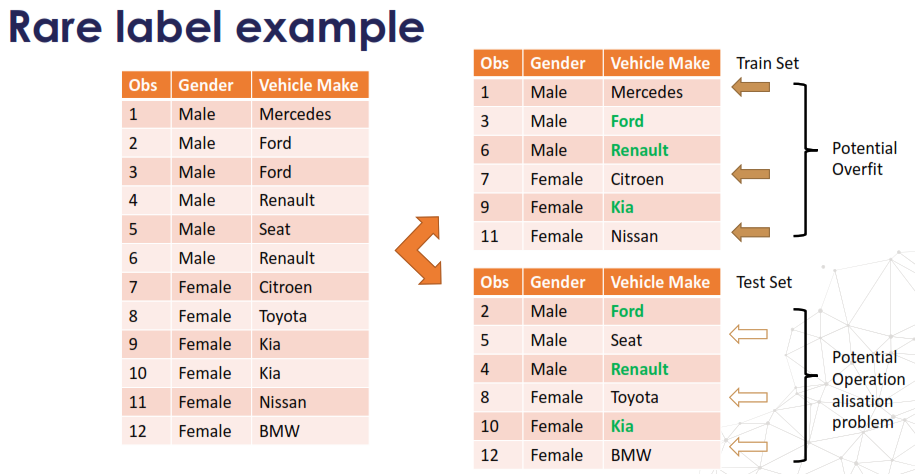

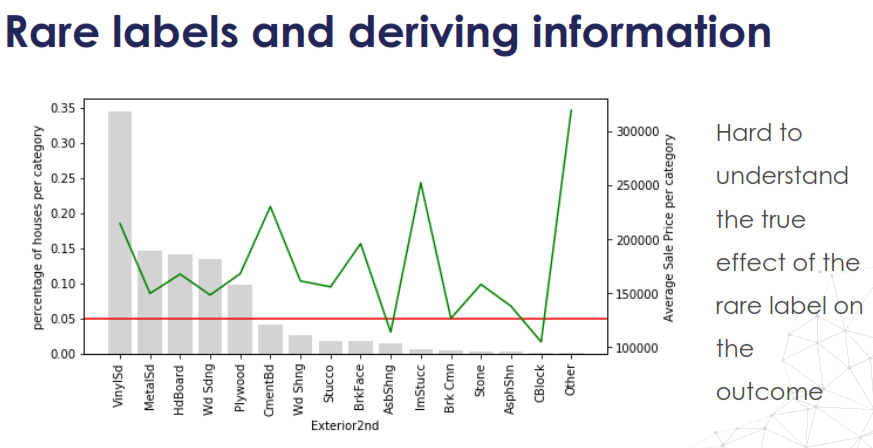

**Are Rare Labels in a categorical variable a problem?**


---


`Rare values can add a lot of information or none at all`. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. `One of the shareholders owns 50%` of the stock, and the `other 999 shareholders own the remaining 50%`. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The `remaining shareholders` may have an `impact collectively`, but they have almost `no impact individually`.

The same occurs in real life datasets. The `label that is over-represented` in the dataset tends to `dominate the outcome`, and those that are under-represented may have no impact individually, but could have an impact if considered collectively.

More specifically,

* `Rare values` in categorical variables `tend to cause over-fitting`, particularly in tree based methods.

* A `big number of infrequent labels` adds noise, with `little information`, therefore causing `over-fitting`.

* Rare labels may be `present` in training set, but `not in` test set, therefore causing over-fitting to the train set.

* Rare labels `may appear` in the test set, and `not in` the train set. Thus, the machine learning model will not know how to evaluate it.

🔑 **Note:** Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# to separate data intro train and test sets
from sklearn.model_selection import train_test_split

In [ ]:
# Variable definitions:

# Neighborhood: Physical locations within Ames city limits
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/houseprice.csv', usecols=use_cols)

data.head()

Neighborhood Exterior1st Exterior2nd  SalePrice
0      CollgCr     VinylSd     VinylSd     208500
1      Veenker     MetalSd     MetalSd     181500
2      CollgCr     VinylSd     VinylSd     223500
3      Crawfor     Wd Sdng     Wd Shng     140000
4      NoRidge     VinylSd     VinylSd     250000

In [ ]:
# let's look at the different number of labels
# in each variable (cardinality)

# these are the loaded categorical variables
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print(f'Number of unique labels in {col}: {data[col].nunique()}')

print('total houses: ', len(data))

Number of unique labels in Neighborhood: 25
Number of unique labels in Exterior1st: 15
Number of unique labels in Exterior2nd: 16
total houses:  1460



The variable 'Neighborhood' shows 25 different categories, 'Exterior1st' shows 15 different categories, and 'Exterior2nd' shows 16 different categories.

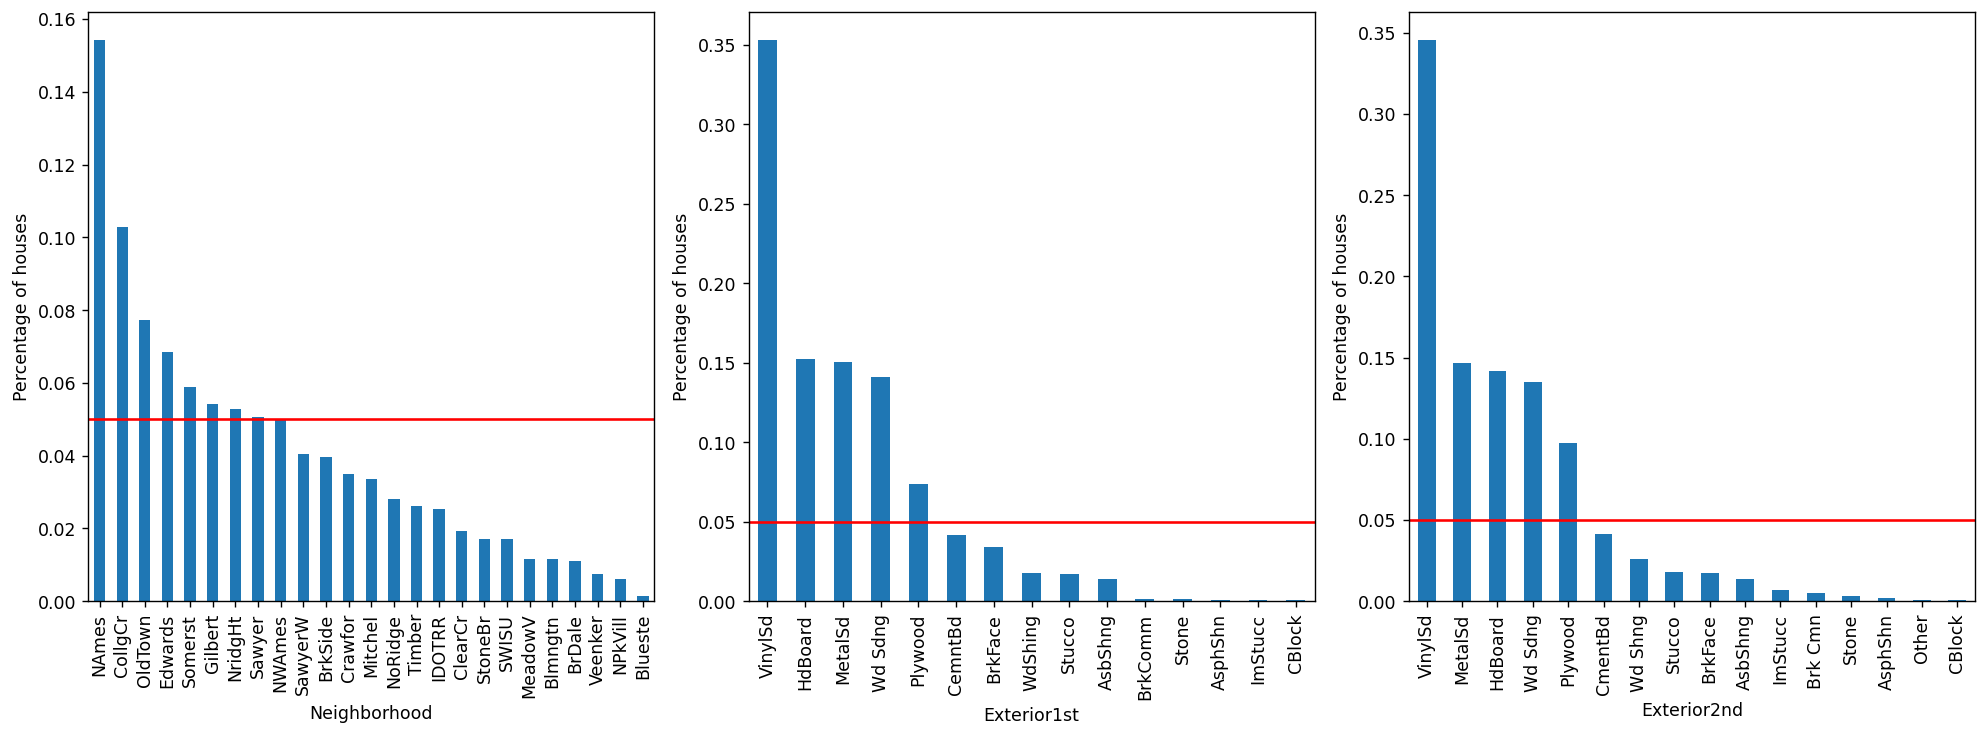

In [ ]:
# let's plot how frequently each label appears in the dataset

# in other words, the percentage of houses in the data with each label

total_houses = len(data)

# for each categorical variable
plt.subplots(figsize=(16,6), dpi=125) # set fig size
count=1 # initial subplot index

for col in cat_cols:

    plt.subplot(1,3,count)
    # aka percentage of houses per category
    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.tight_layout();

    # go to next subplot index
    count += 1

For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or Rare Values and could cause over-fitting.

### **How is the target, "SalePrice", related to these categories?**

In the following cells, We want to understand the mean SalePrice per group of houses that display each categories.

In [ ]:

# the following function calculates:

# 1) the percentage of houses per category
# 2) the mean SalePrice per category


def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [ ]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

Neighborhood  perc_houses      SalePrice
0         NAmes     0.154110  145847.080000
1       CollgCr     0.102740  197965.773333
2       OldTown     0.077397  128225.300885
3       Edwards     0.068493  128219.700000
4       Somerst     0.058904  225379.837209
5       Gilbert     0.054110  192854.506329
6       NridgHt     0.052740  316270.623377
7        Sawyer     0.050685  136793.135135
8        NWAmes     0.050000  189050.068493
9       SawyerW     0.040411  186555.796610
10      BrkSide     0.039726  124834.051724
11      Crawfor     0.034932  210624.725490
12      Mitchel     0.033562  156270.122449
13      NoRidge     0.028082  335295.317073
14       Timber     0.026027  242247.447368
15       IDOTRR     0.025342  100123.783784
16      ClearCr     0.019178  212565.428571
17      StoneBr     0.017123  310499.000000
18        SWISU     0.017123  142591.360000
19      MeadowV     0.011644   98576.470588
20      Blmngtn     0.011644  194870.882353
21       BrDale     0.010959  104493.750000
22      Veenker     0.007534  238772.727273
23      NPkVill     0.006164  142694.444444
24      Blueste     0.001370  137500.000000

The above dataframe contains the percentage of houses that show each one of the labels in Neighborhood, and the mean SalePrice for those group of houses. In other words, ~15% of houses are in NAmes and the mean SalePrice is 145847.

In [ ]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90) # xticks label

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey') # bar plot
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds') #line plot
    ax.axhline(y=0.05, color='red') # horizontal line plot
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()


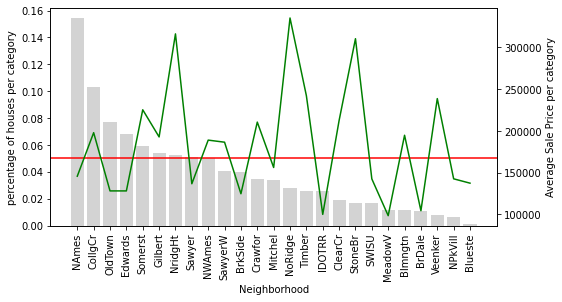

In [ ]:
plot_categories(temp_df, 'Neighborhood')

In [ ]:
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#import plotly.express as px

In [ ]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable
"""
def plot_categories(df, var):
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Bar(x=df[var], y=df["perc_houses"], name="% House of Total", marker_color='blue'),
        secondary_y=False,
    )

    fig.add_trace(
        go.Line(x=df[var], y=df["SalePrice"], name="Average Sale Price", line=dict(color='green')),
        secondary_y=True,
    )

    # Add figure title
    #fig.update_layout(
    #    title_text="Double Y Axis Example"
    #)

    # Set x-axis title
    #fig.update_xaxes(title_text="")

    # add horizontal line
    fig.add_shape(type='line', 
                  y0=0.05, y1=0.05,
                  x0=df.index[0] - 0.5, x1=df.index[-1] + 0.5,
                  xref='x', yref='y',
                  line=dict(color='red'))
    
    # Set y-axes titles
    fig.update_yaxes(title_text="percentage of houses per category", secondary_y=False)
    fig.update_yaxes(title_text="Average Sale Price per category", secondary_y=True)

    fig.show()
    """

'\ndef plot_categories(df, var):\n    \n    # Create figure with secondary y-axis\n    fig = make_subplots(specs=[[{"secondary_y": True}]])\n\n    # Add traces\n    fig.add_trace(\n        go.Bar(x=df[var], y=df["perc_houses"], name="% House of Total", marker_color=\'blue\'),\n        secondary_y=False,\n    )\n\n    fig.add_trace(\n        go.Line(x=df[var], y=df["SalePrice"], name="Average Sale Price", line=dict(color=\'green\')),\n        secondary_y=True,\n    )\n\n    # Add figure title\n    #fig.update_layout(\n    #    title_text="Double Y Axis Example"\n    #)\n\n    # Set x-axis title\n    #fig.update_xaxes(title_text="")\n\n    # add horizontal line\n    fig.add_shape(type=\'line\', \n                  y0=0.05, y1=0.05,\n                  x0=df.index[0] - 0.5, x1=df.index[-1] + 0.5,\n                  xref=\'x\', yref=\'y\',\n                  line=dict(color=\'red\'))\n    \n    # Set y-axes titles\n    fig.update_yaxes(title_text="percentage of houses per category", seconda

In [ ]:
#plot_categories(temp_df, 'Neighborhood')

Houses in the 'Neighborhood' of 'NridgHt' sell at a `high price`, whereas houses in 'Sawyer' `tend to be cheaper`.

Houses in the 'Neighborhood' of 'StoneBr' have on average a `high SalePrice`, above 300k. However, 'StoneBr' is `present in less than 5% of the houses`. Or in other words, less than 5% of the houses in the dataset are located in 'StoneBr'.

> Why is this important? Because `if we do not have` a `lot of houses` to learn from, we could be `under or over-estimating` the effect of 'StoneBr' on the `SalePrice`.

> In other words, how confident are we to generalise that most houses in StoneBr will sell for around 300k, when we only have a few houses to learn from?

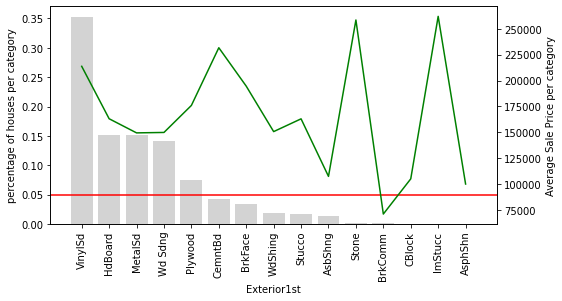

In [ ]:
temp_df = calculate_mean_target_per_category(data, 'Exterior1st')
plot_categories(temp_df, 'Exterior1st')

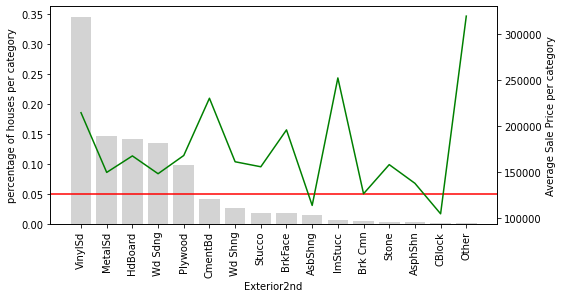

In [ ]:
temp_df = calculate_mean_target_per_category(data, 'Exterior2nd')
plot_categories(temp_df, 'Exterior2nd')


Let's look at variable `Exterior2nd`: `Most of the categories` in Exterior2nd are present in less than 5% of houses. In addition, the "SalePrice" varies a lot across those rare categories. The mean value of SalePrice goes up and down over the infrequent categories. In fact, it looks `quite noisy`. 

> These rare labels could indeed be `very predictive`, or they could be introducing `noise rather than information`. And because the `labels are under-represented`, we` can't be sure` whether they have a true impact on the house price. We could be `under or over-estimating` their impact due to the fact that we have information for few houses.

🔑 **Note:** This plot would bring more value, if we plotted the errors of the mean SalePrice. It would give us an idea of how much the mean value of the target varies within each label. Why don't you go ahead and add the standard deviation to the plot?

### **Rare labels: grouping under a new label**
One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target.

In [ ]:

# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [ ]:
# group rare labels in Neighborhood

data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

Neighborhood Neighborhood_grouped
0      CollgCr              CollgCr
1      Veenker                 rare
2      CollgCr              CollgCr
3      Crawfor                 rare
4      NoRidge                 rare
5      Mitchel                 rare
6      Somerst              Somerst
7       NWAmes               NWAmes
8      OldTown              OldTown
9      BrkSide                 rare

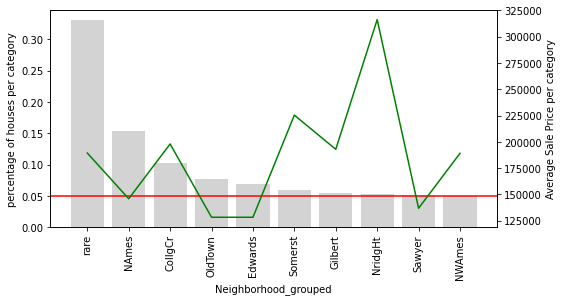

In [ ]:
# let's plot Neighborhood with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the SalePrice.

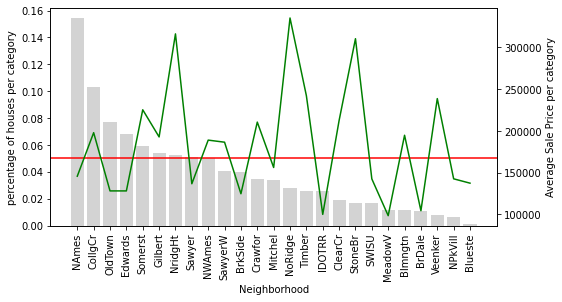

In [ ]:
# let's plot the original Neighborhood for comparison
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average SalePrice for all the infrequent labels.

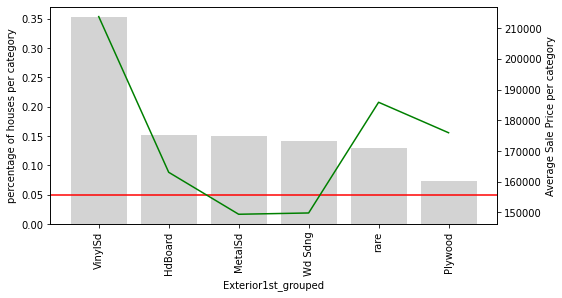

In [ ]:
data['Exterior1st_grouped'] = group_rare_labels(data, 'Exterior1st')
temp_df = calculate_mean_target_per_category(data, 'Exterior1st_grouped')
plot_categories(temp_df, 'Exterior1st_grouped')

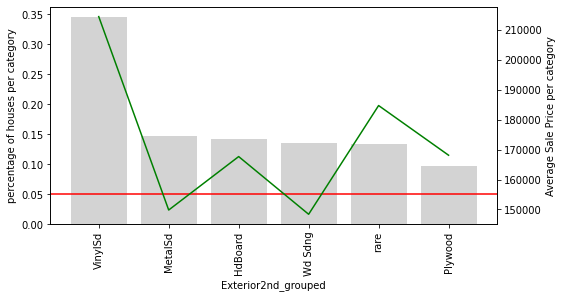

In [ ]:
data['Exterior2nd_grouped'] = group_rare_labels(data, 'Exterior2nd')
temp_df = calculate_mean_target_per_category(data, 'Exterior2nd_grouped')
plot_categories(temp_df, 'Exterior2nd_grouped')

**Here is something interesting:** In the variable Exterior1st, look at how all the houses with `rare values are on average more expensive than the rest`, except for those with VinySd.

The same is true for Exterior2nd. The rare categories seem to have had something in common.

🔑 **Note:** Ideally, we would also like to have the `standard deviation / inter-quantile` range for the SalePrice, to get an idea of how variable the house price is for each category.

### **Rare labels lead to uneven distribution of categories in train and test sets**

Similarly to `highly cardinal variables`, rare or infrequent labels often land only on the training set, or only on the testing set. 

If present only in the training set, they may lead to `over-fitting`. If present only on the testing set, the machine learning algorithm will not know how to handle them, as they have not seen the rare labels during training.

In [ ]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [ ]:
# Let's find labels present only in the training set
# I will use X2 as example

unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]

print(unique_to_train_set)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']



There are 4 categories present in the train set and are not present in the test set.

In [ ]:
# Let's find labels present only in the test set

unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]

print(unique_to_test_set)

['AsphShn']



In this case, there is 1 rare value present in the test set only.

---

## **Variable Distributions** 📍

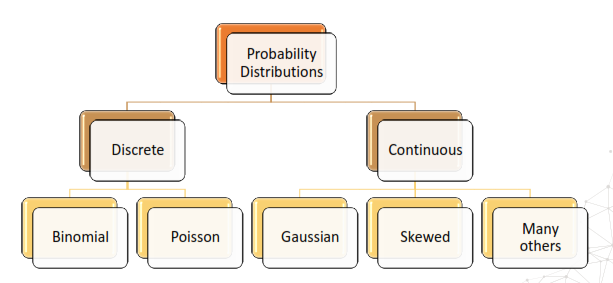

**Resources Link:**

>[Gallery of Distributions](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm)

---
***Normal Distribution***

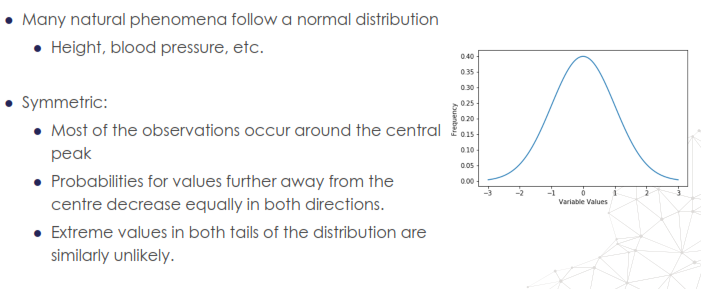

---
***Skew Distribution***

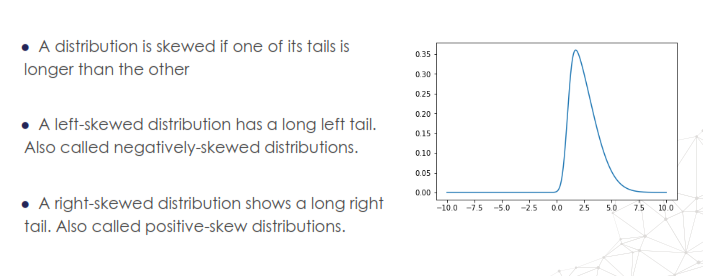

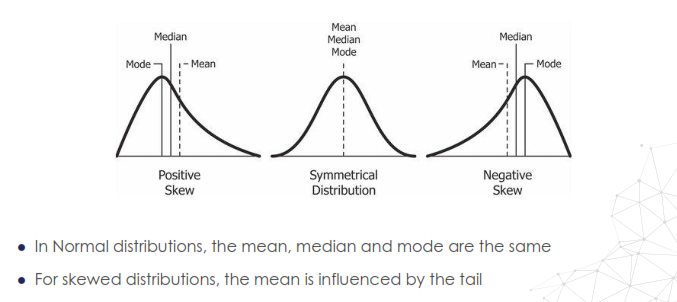

---
***Distributions and Model Performance***

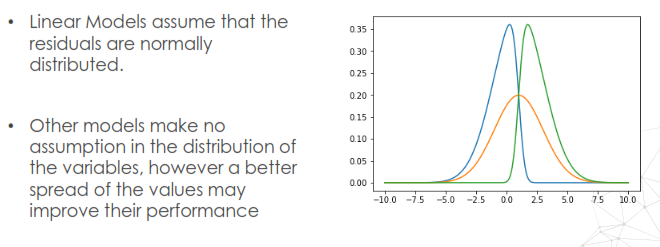

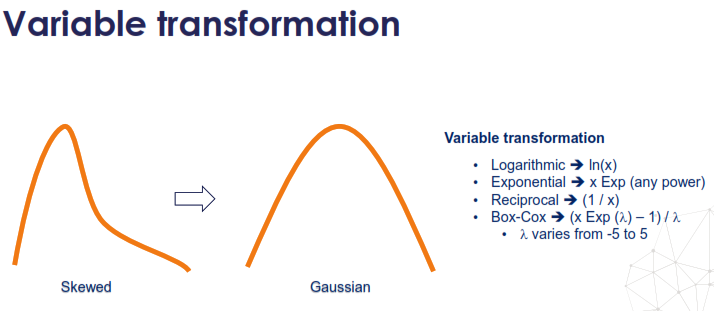

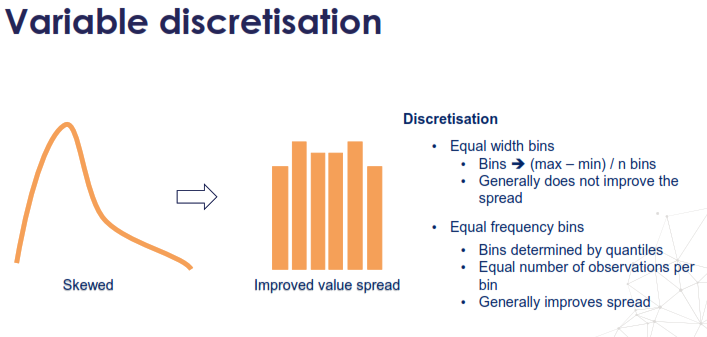

---

## **Linear Model Assumptions** 📍

**Some of the linear regression model assumptions are:**

**1. Linearity:**
> The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

**2. No perfect multicollinearity:**
> There should be no perfect linear relationship between two or more of the predictors.

**3. Normally distributed errors:** 
> the residuals are random, normally distributed with a mean of 0.

**4. Homoscedasticity:**
> At each level of the predictor variable(s), the variance of the residual terms should be constant.





---
**Examples of linear models are:**

1. Linear and Logistic Regression
2. Linear Discriminant Analysis (LDA)

Failure to meet one or more of the model assumptions could end up in a `poor model performance`. In other words, the variables do not accurately predict the outcome, with a linear model.

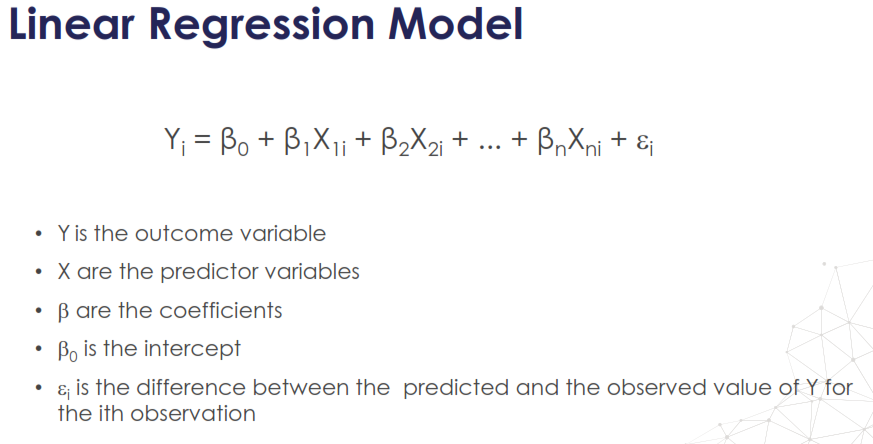

**When the assumptions are met:**
1. The coefficients and parameters of the regression equation are said
to be unbiased.
2. The model can be accurately applied.

---
**When the assumptions are not met:**

The variables are not good enough to predict accurately the outcome.

Some issues could be:
* Outliers
* Lack of homoscedasticity
* The variables are too skewed

**If the assumptions are not met, we can:**

1. use a different no-linear model to predict the outcome from the variables
2. transform the input variables so that they fulfill the assumptions.
 > Sometimes variable transformation can help the variables meet the model assumptions. We normally do 1 of 2 things:
 * Mathematical transformation of the variables
 * Discretisation

---
***Determining if linear model is accurate***

The `main diagnostic` to determine if a linear model works well to predict the outcome from the predictors, is to evaluate in the first place, if the error terms, or residuals follow a `normal distribution` with a mean of zero, and are` homoscedastic`. If this is `true`, we can be fairly confident that the model is doing a good job.

**We can determine normal distribution and homoscedasticity as follows:**

* Normal distribution can be assessed by Q-Q plots
* Homoscedasticity can be assessed by residuals plots

**If we would also like to test the other assumptions:**

* Linear regression can be assessed by scatter-plots and residuals plots
* Multi-colinearity can be assessed by correlation matrices

**Resources Link:**

>[An introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf)

In [ ]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [ ]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [ ]:
# this is the information about the boston house prince dataset
# the aim is to predict the "Median house value (price)" MEDV column of this dataset
# and we have variables with characteristics about the homes and the neighborhoods

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

🔑 **Note:** LSTAT = proportion of adults without some high school education and proportion of male workers classified as laborers.

### **Without Tranformation**

In [ ]:
# to train and evaluate the model, let's first split into
# train and test data, using 3 variables of choice:
# LSTAT, RM and CRIM


X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [ ]:
# let's scale the features
# normal procedure for linear models

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# let's build a linear model using the data as loaded from sklearn

# instantiate a lineear model
linreg = LinearRegression()

# train the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions on the train set and calculate the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions on the test set and calculate the mean squared error
print('\nTest set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

Train set
Linear Regression mse: 28.603232128198893

Test set
Linear Regression mse: 33.20006295308442


#### **Residual (Distribution of Error)** 📍

Another thing that we can do to determine whether there is a linear relationship between the variable and the target is to evaluate the distribution of the errors, or the residuals. The `residuals` refer to the `difference between the predictions and the real value of the target`. It is performed as follows:

1. make a linear regression model using the desired variables (X)

2. obtain the predictions

3. determine the error (True house price - predicted house price)

4. observe the distribution of the error.

If the house price, in this case MEDV, is `linearly explained` by the variables we are evaluating, then:
* the `error` should be `random noise`
* should typically `follow` a normal distribution centered at 0. 

We expect to see the error terms for each observation lying around 0.

In [ ]:
def assumptions_check(x):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.histplot(error, bins=30)

  plt.subplot(1,2,2)
  stats.probplot(error, dist="norm", plot=plt)
  plt.tight_layout;

In [ ]:
# calculate the residuals

error = y_test - pred

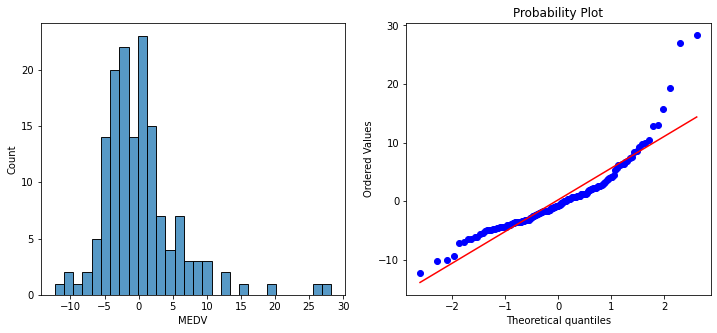

In [ ]:
# we will make a histogram to determine if the residuals are normally distributed with mean value at 0
# we can better visualize residuals distribution with a Q-Q plot. 
# If the residuals are normally distributed the dots should adjust to the 45 degree line
assumptions_check(error)

We see that the residuals show a `fairly normal distribution` centered at 0. `Not perfect`, by visual inspection there is some `skew towards the right`, with a few higher unusual values towards the right of the distribution.

From the Q-Q plot we see more easily how the residuals deviate from the red line towards the ends of the distribution, thus, they are not normally distributed.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


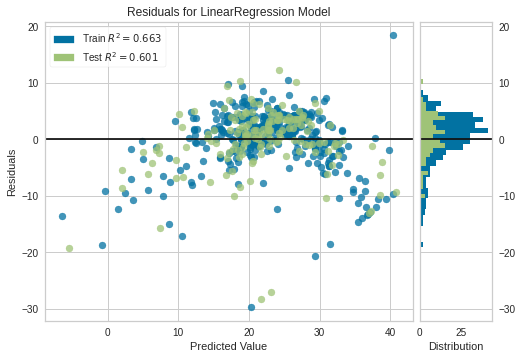

In [ ]:
# in this cell, I want to introduce the use of yellobrick
# a library for visualisation of machine learning model 
# performance

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof();

On the right, we have the distribution of the residuals in the train and test sets. We see that it is `not perfectly centered at 0`.

On the left, we have the `residuals vs the predicted value`, we also see that the `variance is not constant`. Towards the `extremes of the predictions`, the model is `under-estimating` the outcome (most residuals are negative). And towards the `center of the predictions`, the model is `over-estimnating` the outcome. So the `residuals variance is not constant` for all values.

#### **Homoscedasticity** 📍

Homoscedasticity implies that at each level of the predictor variable(s), the `variance of the residual` terms should be `constant`. So we need to plot the residuals against the variables.

Homoscedasticity, also known as `homogeneity of variance`, describes a situation in which the error term, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

> The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

**There are other tests for homoscedasticity:**

* Residuals plot
* Levene’s test
* Barlett’s test
* Goldfeld-Quandt Test

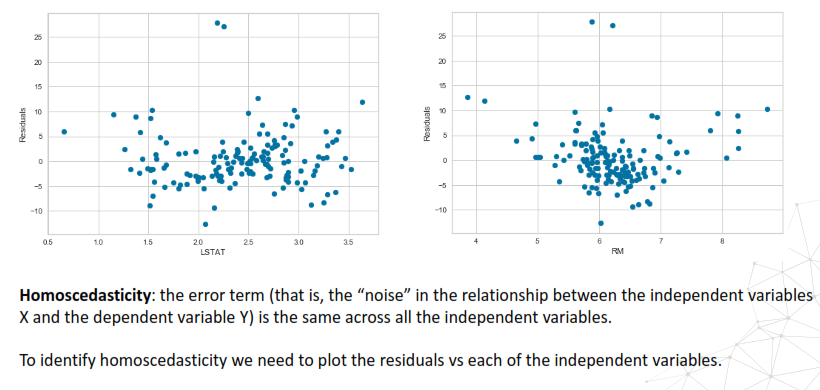

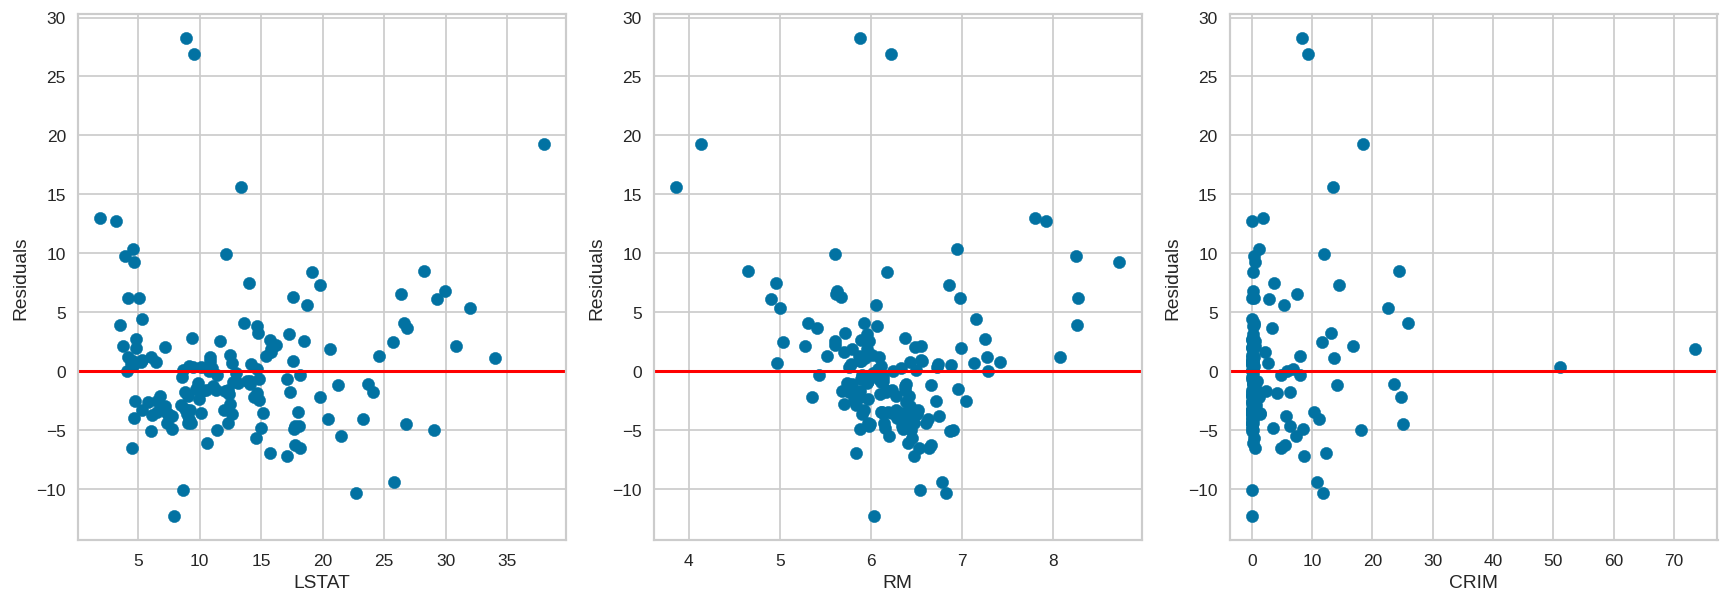

In [ ]:
# plot the residuals vs one of the independent variables

plt.subplots(figsize=(14,5), dpi=125) # set fig size
count=1 # initial subplot index

for i in ['LSTAT', 'RM', 'CRIM']:
  plt.subplot(1,3, count)
  plt.scatter(x=X_test[i], y=error)
  plt.axhline(y=0, color='red')
  plt.xlabel(i)
  plt.ylabel('Residuals')
  plt.tight_layout();
  
  # go to next suplots index
  count +=1

The residuals seem fairly homogeneously distributed across the values of LSTAT.

For RM variable, the residuals do not seem to be homogeneously distributed across the values of RM (terfokus pada 5-7 RM). In fact, low and high values of RM show higher error terms.

Most values of CRIM are distributed towards the left, so it is `hard to say` if the residuals show the same variance for all values of CRIM, because we have `very few data points` for CRIM when its values are high.

---

### **Transform the data to improve model fit** 📍

We will use the Box-Cox transformation

In [ ]:
import scipy.stats as stats

# apply the box-cox transformation to the variables
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [ ]:
# let's scale the features

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# model build a new model using the transformed variables

# specify the model
linreg = LinearRegression()

# fit the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions and calculate the mean squared error over the train set
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions and calculate the mean squared error over the test set
print('\nTest set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

Train set
Linear Regression mse: 25.020138527672213

Test set
Linear Regression mse: 29.70979354458992


#### **Residual (Distribution of Error)**

In [ ]:
# calculate the residuals

error = y_test - pred

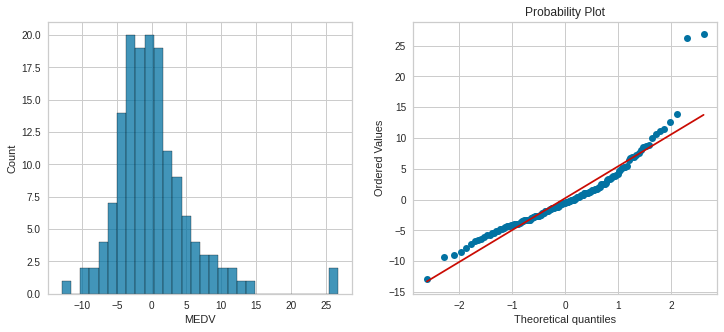

In [ ]:
# we will make a histogram to determine if the residuals are normally distributed with mean value at 0
# we can better visualize residuals distribution with a Q-Q plot. 
# If the residuals are normally distributed the dots should adjust to the 45 degree line
assumptions_check(error)

We see an improvement: the residuals are now "more" normally distributed.

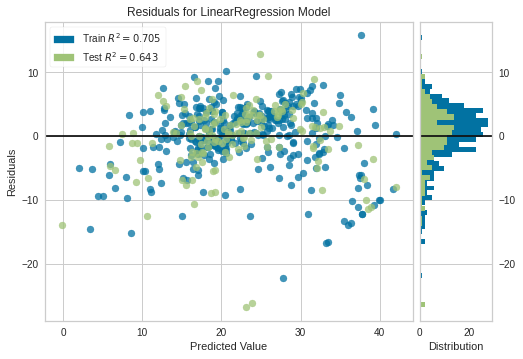

In [ ]:
# let's now do the analysis with yellowbrick

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We can see a noticeable improvement in the distribution of the residuals, now better centered at 0, and with a more even variance across all values of the prediction.

🔑 **Note:** The model performance would improve even further if we transformed the target as well.

#### **Homoscedasticity**

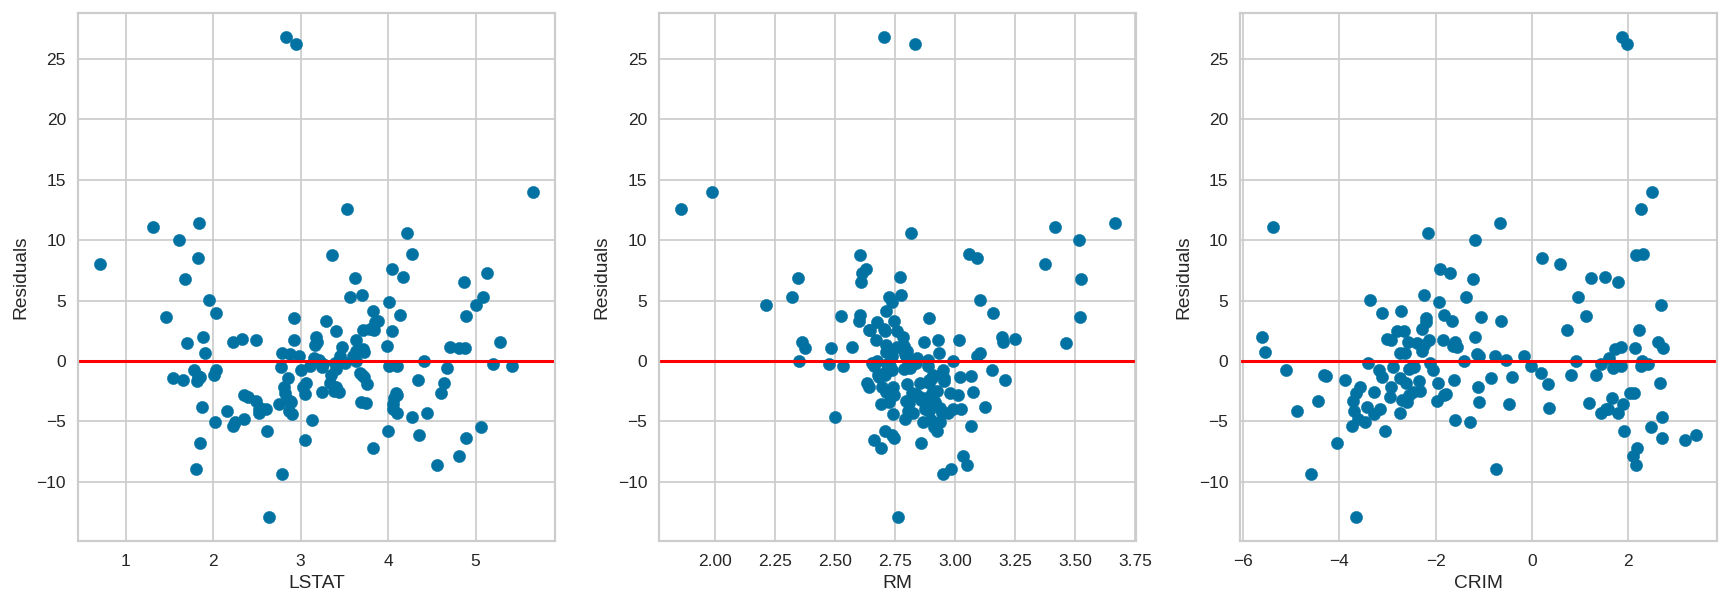

In [ ]:
# plot the residuals vs one of the independent variables

plt.subplots(figsize=(14,5), dpi=125) # set fig size
count=1 # initial subplot index

for i in ['LSTAT', 'RM', 'CRIM']:
  plt.subplot(1,3, count)
  plt.scatter(x=X_test[i], y=error)
  plt.axhline(y=0, color='red')
  plt.xlabel(i)
  plt.ylabel('Residuals')
  plt.tight_layout();
  
  # go to next suplots index
  count +=1

The residuals seem fairly homogeneously distributed across the values, except for RM (centered on 2-3)

### **Compare model assumptions**

#### **Linear relationship** 📍
We evaluate linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

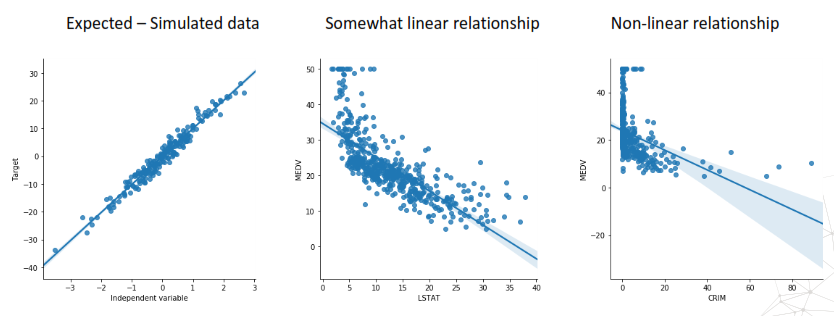

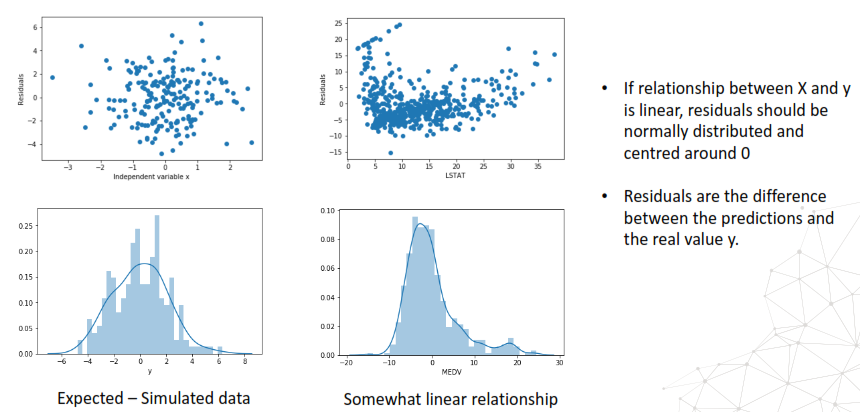

##### **With simulated data**

In [ ]:
# create a dataframe with the variable x that follows a normal distribution and shows a
# linear relationship with y

# this will provide the expected plots i.e., how the plots should look like if the
# assumptions are met

np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T # create datafreme and transpose it (wide format to long format)
toy_df.columns = ['x', 'y']
toy_df.head()

x          y
0 -0.417482  -1.271561
1  0.706032   7.990600
2  1.915985  19.848687
3 -2.141755 -21.928903
4  0.719057   5.579070

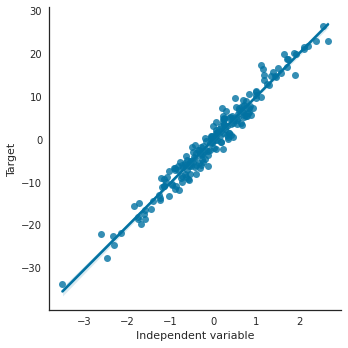

In [ ]:
# this is how the plot looks like when there is a linear relationship
sns.set_style('white')
sns.lmplot(x="x", y="y", data=toy_df, order=1) # order = 1 -> persamaan orde pertama
plt.ylabel('Target')
plt.xlabel('Independent variable');

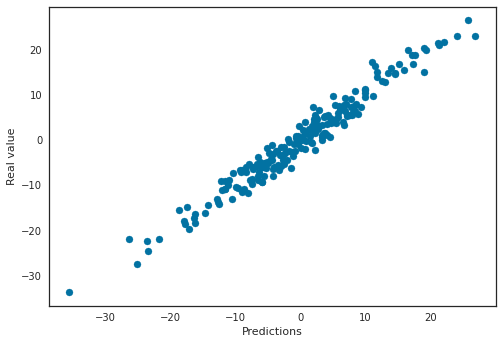

In [ ]:
# SIMULATED DATA

# step 1: make a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# step 2: obtain the predictions make the predictions
pred = linreg.predict(toy_df['x'].to_frame())

# step 3: calculate the residuals
error = toy_df['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value');

The model makes good predictions. The predictions are quite aligned with the real value of the target.

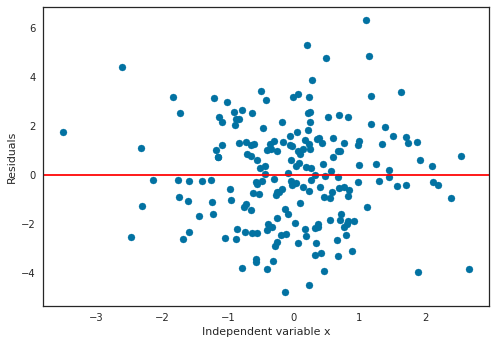

In [ ]:
# step 4: observe the distribution of the errors

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=toy_df['x'])
plt.axhline(y=0, color='red')
plt.ylabel('Residuals')
plt.xlabel('Independent variable x');

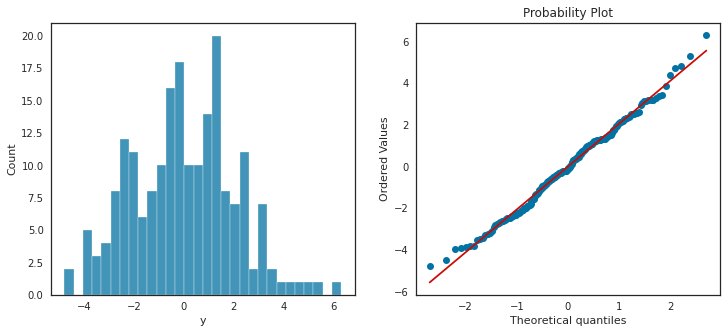

In [ ]:
# step 4: observe the distribution of the errors

# plot a histogram and QQ plot of the residuals
# they should follow a gaussian distribution centered around 0

assumptions_check(error)

The errors adopt a Gaussian distribution and it is centered around 0. So it meets the assumptions, as expected.

##### **with Boston house price dataset (Transformed)**

Remember that we [transformed the variables](https://colab.research.google.com/drive/1EvJm2lAtO4y2HWjYaTjGBgCj5SnZpJ-E#scrollTo=rn261YzYkDMm&line=4&uniqifier=1) already


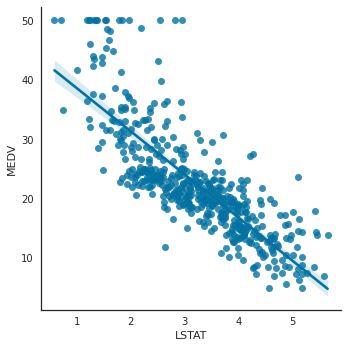

In [ ]:
# now we make a scatter plot for the boston house price dataset

# we plot LAST (% lower status of the population) vs MEDV (median value of the house)

sns.lmplot(x="LSTAT", y="MEDV",
           data=boston, order=1); # order = 1 -> persamaan orde pertama

The relationship between LSTAT and MEDV is fairly linear apart from a few values around the minimal values of LSTAT, towards the top left side of the plot.

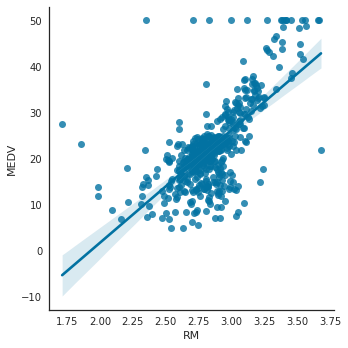

In [ ]:
# now we plot RM (average number of rooms per dwelling) vs MEDV (median value of the house)

sns.lmplot(x="RM", y="MEDV",
           data=boston, order=1);

The relationship between the target and transformed RM is not very linear. We could consider, transforming this variable further, removing the variable from the model, or using a non-linear model to predict MEDV from RM.

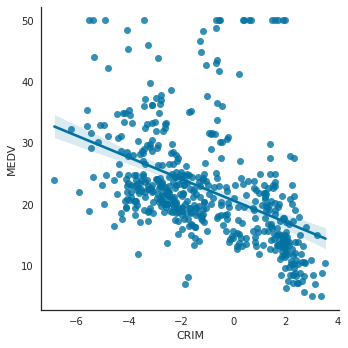

In [ ]:
# now we plot CRIM (per capita crime rate by town) vs MEDV (median value of the house)

sns.lmplot(x="CRIM", y="MEDV",
           data=boston, order=1);

The relationship is also not perfectly linear between CRIM and MEDV.

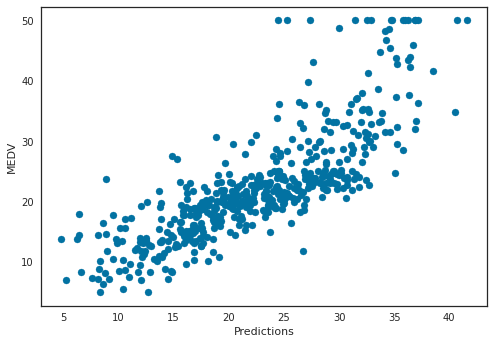

In [ ]:
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV');

There is a relatively good fit for most of the predictions, but the model does not predict very well towards the highest house prices. For `high house prices`, the model `under-estimates` the price.

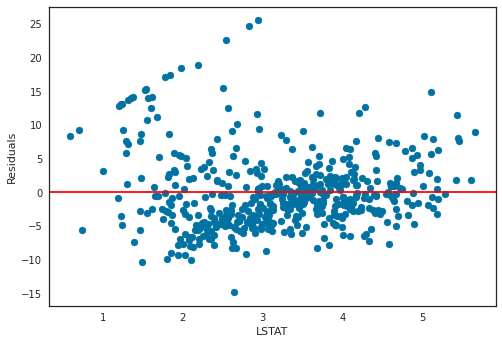

In [ ]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.axhline(y=0, color='red')
plt.ylabel('Residuals')
plt.xlabel('LSTAT');

The residuals are `not really` centered around zero. And the errors are `not homogeneously` distributed across the values of LSTAT. `Low and high` values of LSTAT show higher errors.

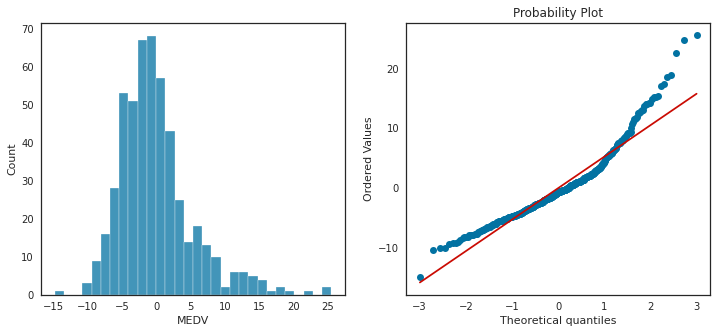

In [ ]:
# plot a histogram and QQ plot of the residuals they should follow a gaussian distribution
assumptions_check(error)

The residuals are `not centered` around zero, and the distribution is `not totally Gaussian`.

#### **Multicolinearity**

1. Multicollinearity `occurs` when the
independent variables are `correlated` with
each other

2. Multicollinearity can be `assessed` with a
correlation matrix or the variance inflation 
factor (VIF)

To determine co-linearity, we evaluate the `correlation of all the independent variables` in the dataframe **(Transformed Boston house price dataset)**.

In [ ]:
boston.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

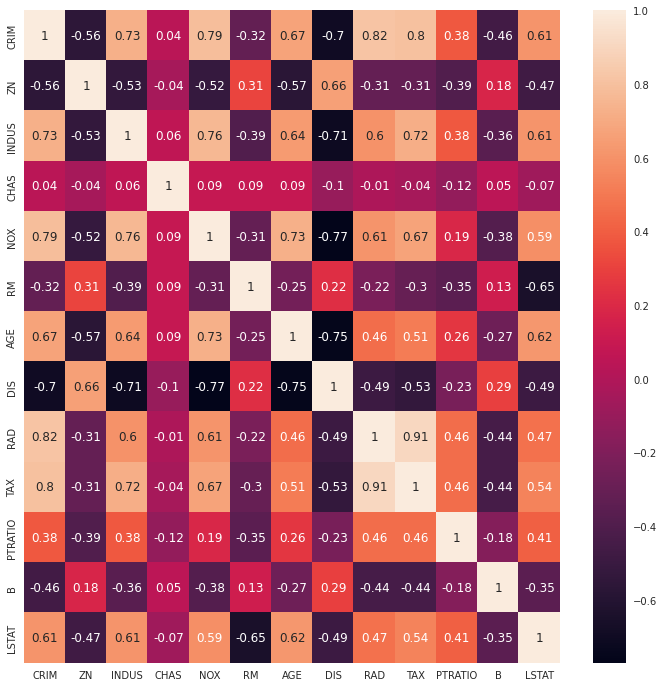

In [ ]:
# we calculate the correlations using pandas corr and we round the values to 2 decimals
correlation_matrix = boston[boston.columns[:-1]].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values

plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True);

On the x and y axis of the heatmap we have the variables of the boston house dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for `LSTAT vs RAD`, we see a `correlation` of 0.47. These 2 variables are `not highly correlated`.

Instead, for the variables `RAD and TAX` (try and find them in the plot), the `correlation` is 0.91. These variables are `highly correlated`. The same is true for the variables `NOX and DIS`, which show a correlation value of -0.71.

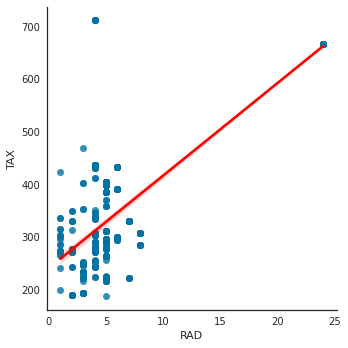

In [ ]:
# correlation between RAD (index of accessibility to radial highways)
# and TAX (full-value property-tax rate per $10,000)

sns.lmplot(x="RAD", y="TAX", data=boston, order=1, 
           line_kws={'color': 'red'});

Highly correlated

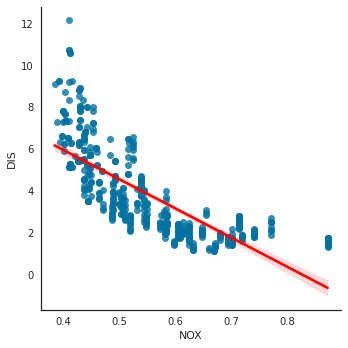

In [ ]:
# and now NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres)

sns.lmplot(x="NOX", y="DIS", data=boston, order=1,
           line_kws={'color': 'red'});

Highly correlated

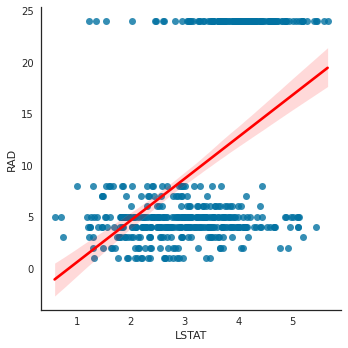

In [ ]:
# let check LSTAT vs RAD with correlation of 0.47

sns.lmplot(x="LSTAT", y="RAD", data=boston, order=1,
           line_kws={'color': 'red'});

Not highly correlated

---

## **Outliers** 📍

An outlier is a data point which is `significantly different` from the remaining data. 

>"An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." - D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.





---



***Should outliers be removed?***

Depending on the context, outliers either `deserve special attention` or should be `completely ignored`. Take the example:
> If `unusual spikes` of revenue forecasting are observed, it's probably a good idea to pay `extra attention` to them and figure out what caused the spike. 

>In the same way, an `unusual transaction` on a credit card is usually a sign of `fraudulent activity`, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and `investigate further` outlier values.

If outliers are however, introduced due to `mechanical error`, `measurement error` or `anything else` that `can't be generalised`, it is a `good idea to remove` these outliers before feeding the data to the modeling algorithm. Why? Because some algorithms are `sensitive` to outliers.

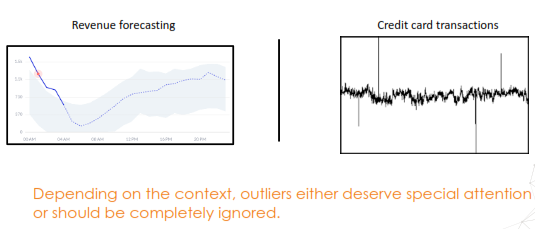



---



***Which machine learning models are sensitive to outliers?***

Some machine learning models are more sensitive to outliers than others. For instance:

1. `AdaBoost` may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with `bad generalisation`.

2. `Linear models`, in particular Linear Regression, can be also sensitive to outliers.

3. `Decision trees` tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= a certain value, and therefore the outlier will fall on each side of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

A recent research article suggests that `Neural Networks` could also be `sensitive` to outliers, provided the `number of outliers` is high and the `deviation` is also high. I would argue that if the `number of outliers` is high,
> (>15% as suggested in the article) 

then they are `no longer outliers`, and rather a `fair representation` of that variable. 




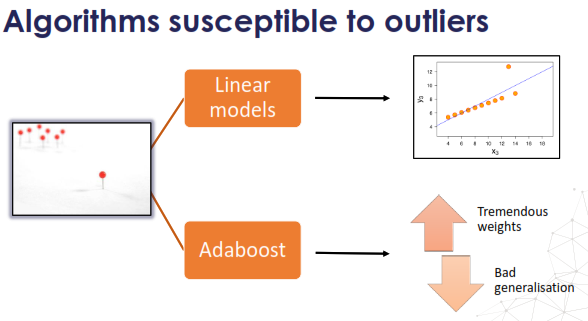



---


***How can outliers be identified?***

Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations. These are `mostly targeted `to identify outliers when those are the observations that we indeed want to focus on, for example for fraudulent credit card activity.

We will `focus` on:

1. Identifying those outliers introduced by mechanical or measurement error
2. Those outliers that are indeed a rare case in the population
3. Those outliers that could be ignored. 

We can learn how to `pre-process them before` using the variable to train machine learning algorithms.



---


***Extreme Value Analysis***

The most `basic form` of outlier detection is **Extreme Value Analysis of 1-dimensional data**. The key for this method is to determine the `statistical tails of the underlying distribution of the variable`, and then `find the values` that sit at the `very end of the tails`.

1. If the the variable is `Normally distributed (Gaussian)`, then the values that lie outside the mean plus or minus 3 times the standard deviation of the variable are considered outliers.
  * `outliers = mean +/- 3* std`

2. If the variable is `skewed distributed`, a general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:

  * `IQR = 75th quantile - 25th quantile`

  >An outlier will sit outside the following upper and lower boundaries:

  * `Upper boundary = 75th quantile + (IQR * 1.5)`

  * `Lower boundary = 25th quantile - (IQR * 1.5)`

  > or for extreme cases:

  * `Upper boundary = 75th quantile + (IQR * 3)`

  * `Lower boundary = 25th quantile - (IQR * 3)`

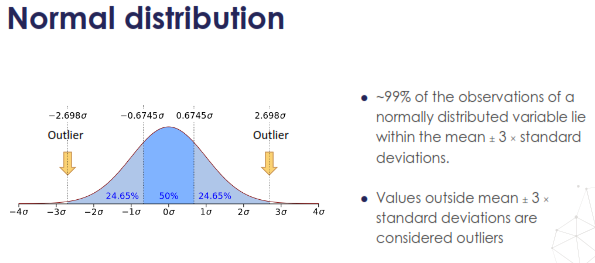

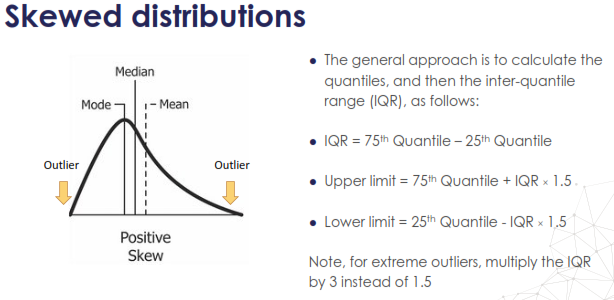

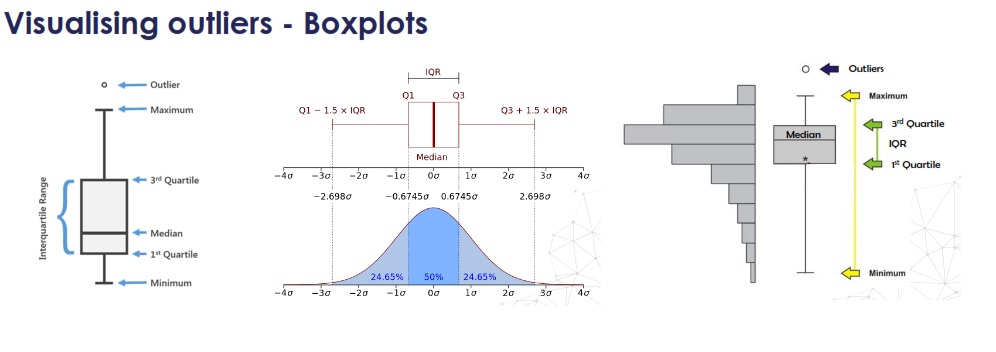

**Resources Link:**

>[Why is AdaBoost algorithm sensitive to noisy data and outliers?](https://www.quora.com/Why-is-AdaBoost-algorithm-sensitive-to-noisy-data-and-outliers-And-how)

>[Why is Logistic Regression robust to outliers compared to least squares?](https://www.quora.com/Why-is-logistic-regression-considered-robust-to-outliers-compared-to-a-least-square-method)

>[Can Logistic Regression be considered robust to outliers?](https://www.quora.com/Can-Logistic-Regression-be-considered-robust-to-outliers)

>[The Effects of Outlier Data on Neural Networks Performance](https://www.researchgate.net/profile/Azme_Khamis/publication/26568300_The_Effects_of_Outliers_Data_on_Neural_Network_Performance/links/564802c908ae54697fbc10de/The-Effects-of-Outliers-Data-on-Neural-Network-Performance.pdf)

>[Outlier Analysis by C. Aggarwal](http://charuaggarwal.net/outlierbook.pdf)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

In [ ]:
# load the the Boston House price data from sklearn
boston_dataset = load_boston()

# print information for boston dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

🔑 **Note:** LSTAT = proportion of adults without some high school education and proportion of male workers classified as laborers.

In [ ]:
# create a dataframe with the independent variables

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]


boston.head()

RM  LSTAT     CRIM
0  6.575   4.98  0.00632
1  6.421   9.14  0.02731
2  7.185   4.03  0.02729
3  6.998   2.94  0.03237
4  7.147   5.33  0.06905

In [ ]:
# load the titanic dataset

titanic = pd.read_csv('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/titanic.csv',
                      usecols=['age', 'fare'])

# The variables age and fare have missing values, we will remove them for this demo
titanic.dropna(subset=['age', 'fare'], inplace=True)

titanic.head()

age      fare
0  29.0000  211.3375
1   0.9167  151.5500
2   2.0000  151.5500
3  30.0000  151.5500
4  25.0000  151.5500

### **Outlier Detection** 💡

In `Normally distributed` variables, **outliers** are those values that lie beyond the `mean plus or minus 3 times the standard deviation`. If the variables are `skewed` however, we find **outliers** using the `inter-quantile range`. 

> In order to `decide which method to utilise to detect outliers`, we first need to know the `distribution of the variable`.

We can use `histograms` and `Q-Q plots` to determine if the variable is `normally distributed`. We can also use `boxplots` to directly `visualise the outliers`. Boxplots are a standard way of displaying the distribution of a variable utilising the first quartile, the median, the third quartile and the whiskers.

In [ ]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel(f'{variable} quantiles')

    # boxplot & striplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    sns.stripplot(y=df[variable], 
              jitter=0.03, # This can be useful when you have many points and they overlap
              alpha=0.3,
              color="red");
    plt.title('Boxplot & Stripplot')

    plt.show()

#### **Normal Distribution**

In [ ]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

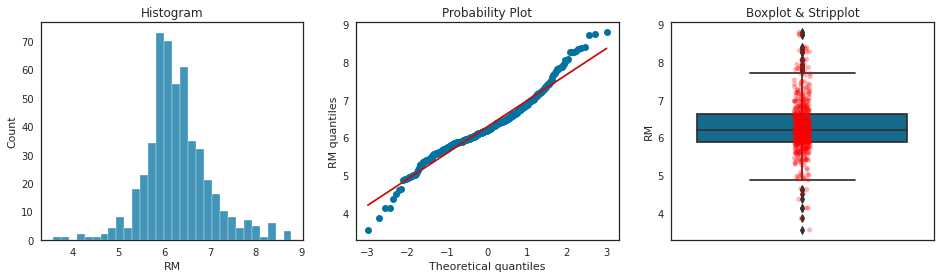

In [ ]:
# let's start with the variable RM from the boston house dataset.
# RM is the average number of rooms per dwelling

diagnostic_plots(boston, 'RM')

From the histogram and the Q-Q plot, we see that the **variable RM** approximates a `Gaussian distribution quite well`. 

In the boxplot, we see that the variable `could have outliers`, as there are `many dots` sitting **outside the whiskers**, at `both tails` of the distribution.

🔑 **Note:** Boxplot often misrepresent distributions so combine it with stripplot

In [ ]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597757, 4.176782957105816)

From the above we conclude that values bigger than 8.4 or smaller than 4.2 occur very rarely for the variable RM. Therefore, we can consider them outliers.

In [ ]:
# inspect the number and percentage of outliers for RM

print('total number of houses: {}'.format(len(boston)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(len(boston[boston['RM'] > upper_boundary])))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(len(boston[boston['RM'] < lower_boundary])))

print('\n% right end outliers: {}'.format(len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('% left end outliers: {}'.format(len(boston[boston['RM'] < lower_boundary]) / len(boston)))

total number of houses: 506
houses with more than 8.4 rooms (right end outliers): 4
houses with less than 4.2 rooms (left end outliers: 4

% right end outliers: 0.007905138339920948
% left end outliers: 0.007905138339920948


Using **Extreme Value Analysis** we identified `outliers` at both ends of the distribution of RM. The `percentage of outliers is small` (1.4% considering the 2 tails together), which makes sense, because we are finding precisely outliers. That is, `rare values`, rare occurrences.



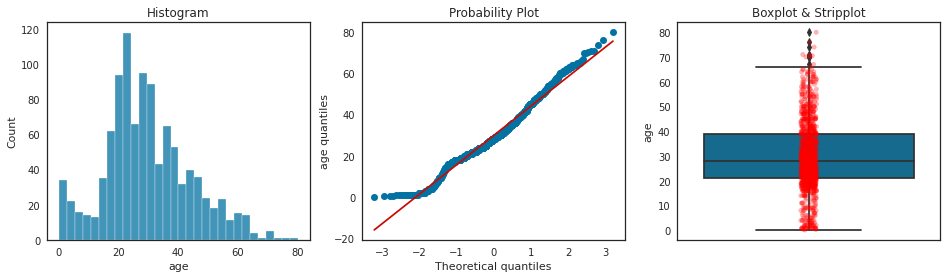

In [ ]:
# let's inspect now the variable Age from the titanic
# refers to the age of the passengers on board

diagnostic_plots(titanic, 'age')

From the histogram and the Q-Q plot, we see that the variable approximates `fairly well a Gaussian distribution`. There is a `deviation` from the distribution towards the `smaller values of age`. 

In the boxplot, we can see that the variable `could have outliers`, as there are `many dots` sitting **outside the whiskers**, at the `right end of the distribution` (top whisker in the boxplot).

In [ ]:
# calculate boundaries for Age in the titanic

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.01943709155127, -13.31576876619241)

The `upper boundary` is 73 years, which means that passengers older than 73 were very few, if any, in the titanic. The `lower boundary` is negative. Because negative age `does not exist`, it only makes sense to look for outliers utilising the upper boundary.

In [ ]:
# lets look at the number and percentage of outliers

print('total passengers: {}'.format(len(titanic)))

print('passengers older than 73: {}'.format(len(titanic[titanic['age'] > upper_boundary])))
print('\n% of passengers older than 73: {}'.format(len(titanic[titanic['age'] > upper_boundary]) / len(titanic)))

total passengers: 1045
passengers older than 73: 3

% of passengers older than 73: 0.0028708133971291866


There were 2 passengers older than 73 on board of the titanic, which could be considered outliers, as the majority of the population where much younger.

#### **Skew Distribution**

In [ ]:
# function to find upper and lower boundaries
# for skewed distributed variables
import numpy as np
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = np.percentile(df[variable], 75) - np.percentile(df[variable], 25)

    lower_boundary = np.percentile(df[variable], 25) - (IQR * distance) # distance = 1.5 or 3
    upper_boundary = np.percentile(df[variable], 75) + (IQR * distance)

    return upper_boundary, lower_boundary

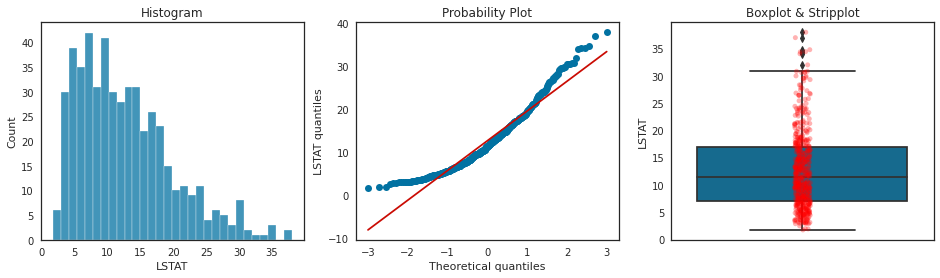

In [ ]:
# variable LSTAT from the boston house dataset
# LSTAT is the % lower status of the population

diagnostic_plots(boston, 'LSTAT')

LSTAT is `not normally distributed`, it is `skewed` with a `tail to the right`. According to the boxplot, there are some `outliers at the right end of the distribution` of the variable.

In [ ]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

The upper boundary shows a value of ~32. The lower boundary is negative, however the variable LSTAT does not take negative values. So to calculate the outliers for LSTAT we only use the upper boundary.

In [ ]:
# lets look at the number and percentage of outliers
# for LSTAT

print('total houses: {}'.format(len(boston)))
print('houses with LSTAT bigger than 32: {}'.format(len(boston[boston['LSTAT'] > upper_boundary])))

print('\n% houses with LSTAT bigger than 32: {}'.format(len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

total houses: 506
houses with LSTAT bigger than 32: 7

% houses with LSTAT bigger than 32: 0.01383399209486166


 This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of LSTAT's distribution. We observe 7 houses, 1.3 % of the dataset, with extremely high values for LSTAT.

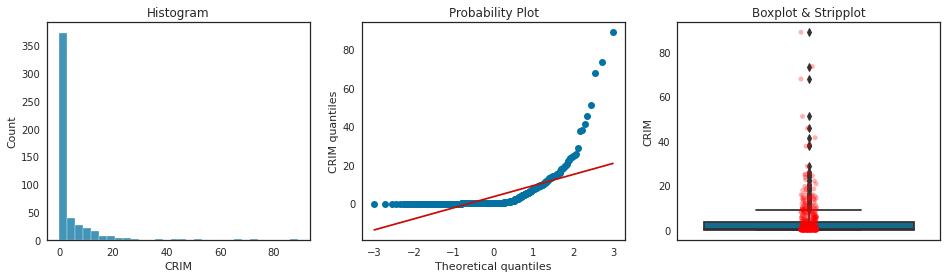

In [ ]:
# variable CRIM from the boston house dataset
# CRIM is the per capita crime rate by town

diagnostic_plots(boston, 'CRIM')

CRIM is `heavily skewed`, with a tail to the right. There seems to be quite a few `outliers` as well at the `right end of the distribution`, according to the boxplot.

In [ ]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 3, now I am looking for extremely high values

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

For CRIM as well, the `lower boundary is negative`, so it only makes sense to use the upper boundary to calculate outliers, as the variable takes `only positive values`.

In [ ]:
# lets look at the number and percentage of outliers
# for CRIM

print('total houses: {}'.format(len(boston)))
print('houses with CRIM bigger than 14: {}'.format(len(boston[boston['CRIM'] > upper_boundary])))

print('\n% houses with CRIM bigger than 14s: {}'.format(len(boston[boston['CRIM'] > upper_boundary]) / len(boston)))

total houses: 506
houses with CRIM bigger than 14: 30

% houses with CRIM bigger than 14s: 0.05928853754940711


When using the 3 times inter-quantile range to find outliers, we find that ~6% of the houses show `unusually high crime rate areas`.  This coincides with what we observed in CRIM's boxplot earlier.

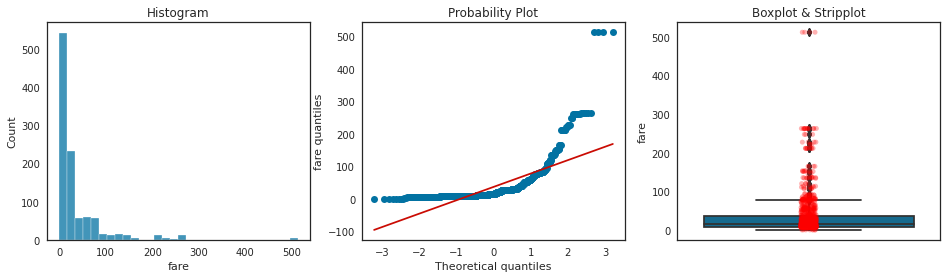

In [ ]:
# variable Fare from the titanic dataset
# Fare is the price paid for the ticket by the passengers

diagnostic_plots(titanic, 'fare')

Fare is also very skewed, and shows some unusual values at the right end of its distribution.

We will identify outliers using the mean and the standard deviation for the variables RM and Age from the boston and titanic datasets, respectively. Then we will use the inter-quantile range to identify outliers for the variables LSTAT, CRIM and Fare from the boston and titanic datasets.

In [ ]:
# finally, identify outliers in Fare in the
# titanic dataset. I will look again for extreme values
# using IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
upper_boundary, lower_boundary

(117.85, -74.3)

For Fare, as well as for all the other variables which show a tail to the right, the `lower boundary is negative`. So we will `use the upper boundary` to determine the outliers.

In [ ]:
# lets look at the number and percentage of passengers
# who paid extremely high Fares

print('total passengers: {}'.format(len(titanic)))
print('passengers who paid more than 117: {}'.format(len(titanic[titanic['fare'] > upper_boundary])))

print('\n% passengers who paid more than 117: {}'.format(len(titanic[titanic['fare'] > upper_boundary])/len(titanic)))

total passengers: 1045
passengers who paid more than 117: 67

% passengers who paid more than 117: 0.06411483253588517


We observe that 6% of the values of the dataset fall above the boundary.

---

## **Variable (Feature) Magnitude** 📍

***Does the magnitude of the variable matter?***

In Linear Regression models, the `scale of variables` used to estimate the output matters. Linear models are of the type `y = w x + b`, where the regression coefficient w represents the expected change in y for a one unit change in x (the predictor). Thus, the `magnitude of w` is partly `determined` by the `magnitude of the units being used for x`. If x is a distance variable, just `changing the scale from kilometers to miles` will cause a `change in the magnitude` of the coefficient.

> In addition, in situations where we estimate the outcome y by contemplating multiple predictors x1, x2, ...xn, predictors with greater numeric ranges dominate over those with smaller numeric ranges.

> Gradient descent converges faster when all the predictors (x1 to xn) are within a similar scale, therefore having features in a `similar scale is useful for Neural Networks` as well as.

> In Support Vector Machines, feature scaling can decrease the time to find the support vectors.

Finally, `methods using Euclidean distances or distances in general` are also `affected by the magnitude of the features`, as `Euclidean distance is sensitive` to variations in the `magnitude or scales of the predictors`. Therefore `feature scaling is required` for methods that `utilise distance calculations` like k-nearest neighbours (KNN) and k-means clustering.

🔑 **In summary:**

**Magnitude matters because:**
* The regression coefficient is directly influenced by the scale of the variable
* Variables with bigger magnitude / value range dominate over the ones with smaller magnitude / value range
* Gradient descent converges faster when features are on similar scales
* Feature scaling helps decrease the time to find support vectors for SVMs
* Euclidean distances are sensitive to feature magnitude.

**The machine learning models `affected` by the magnitude of the feature are:**
1. Linear and Logistic Regression
2. Neural Networks
3. Support Vector Machines
4. KNN
5. K-means clustering
6. Linear Discriminant Analysis (LDA)
7. Principal Component Analysis (PCA)

**Machine learning models `insensitive` to feature magnitude are the ones based on Trees:**
1. Classification and Regression Trees
2. Random Forests
3. Gradient Boosted Trees

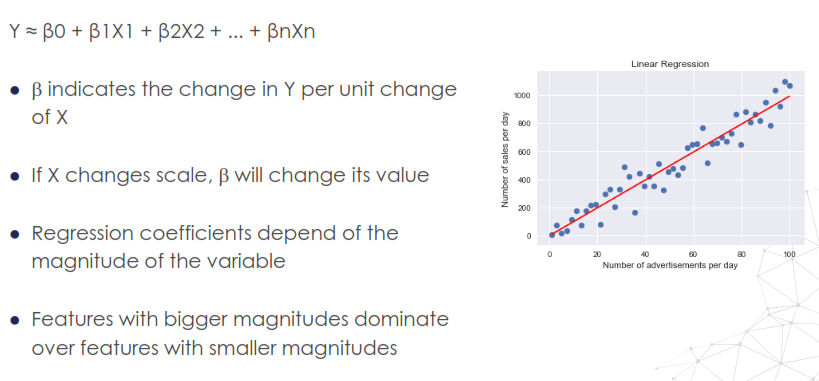

In [ ]:
import pandas as pd
import numpy as np

# import several machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to evaluate performance and separate into
# train and test set
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# load numerical variables of the Titanic Dataset

data = pd.read_csv('/content/drive/MyDrive/AI_and_Embedded_Systems/AI/References/01_EDA/02_Data_Cleansing_and_Preprocessing/00_Feature_Engineering/titanic.csv',
                   usecols=['pclass', 'age', 'fare', 'survived'])
data.head()

pclass  survived      age      fare
0       1         1  29.0000  211.3375
1       1         1   0.9167  151.5500
2       1         0   2.0000  151.5500
3       1         0  30.0000  151.5500
4       1         0  25.0000  151.5500

In [ ]:
# let's have a look at the values of those variables
# to get an idea of the feature magnitudes

data.describe()

pclass     survived          age         fare
count  1309.000000  1309.000000  1046.000000  1308.000000
mean      2.294882     0.381971    29.881135    33.295479
std       0.837836     0.486055    14.413500    51.758668
min       1.000000     0.000000     0.166700     0.000000
25%       2.000000     0.000000    21.000000     7.895800
50%       3.000000     0.000000    28.000000    14.454200
75%       3.000000     1.000000    39.000000    31.275000
max       3.000000     1.000000    80.000000   512.329200

We can see that Fare varies between 0 and 512, Age between 0 and 80, and Class between 0 and 3. So the variables have different magnitude.

In [ ]:
# let's now calculate the range

for col in ['pclass', 'age', 'fare']:
    print(col, 'range: ', data[col].max() - data[col].min())

pclass range:  2
age range:  79.8333
fare range:  512.3292


The range of values that each variable can take are quite different.

In [ ]:
# let's separate into training and testing set
# the titanic dataset contains missing information
# so for this demo, we will fill those in with 0s

X_train, X_test, y_train, y_test = train_test_split(data[['pclass', 'age', 'fare']].fillna(0),
                                                    data['survived'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((916, 3), (393, 3))

### **Feature Scaling** 📍

For this demonstration, I will scale the features between 0 and 1, using the MinMaxScaler from scikit-learn. 

The transformation is given by:

`X_rescaled = X - X.min() / (X.max - X.min()`

And to transform the re-scaled features back to their original magnitude:

`X = X_rescaled * (max - min) + min`

**Resources Link:**

>[Should I normalize/standardize/rescale the data?](http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html)

>[Efficient BackProp by Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

>[Standardization and Its Effects on K -Means Clustering Algorithm](http://maxwellsci.com/print/rjaset/v6-3299-3303.pdf)

>[Feature scaling in support vector data description](http://rduin.nl/papers/asci_02_occ.pdf)

In [ ]:
# scale the features between 0 and 1.

# cal the scaler
scaler = MinMaxScaler()

# fit the scaler (only fit on train data)
scaler.fit(X_train)

# re scale the datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#let's have a look at the scaled training dataset

print('Mean: ', X_train_scaled.mean(axis=0)) # axis=0 -> row based
print('Standard Deviation: ', X_train_scaled.std(axis=0))
print('Minimum value: ', X_train_scaled.min(axis=0))
print('Maximum value: ', X_train_scaled.max(axis=0))

Mean:  [0.64628821 0.33048359 0.06349833]
Standard Deviation:  [0.42105785 0.23332045 0.09250036]
Minimum value:  [0. 0. 0.]
Maximum value:  [1. 1. 1.]


Now, the maximum values for all the features is 1, and the minimum value is zero, as expected. So they are in a more similar scale.

### **Effect on Machine Learning Model (Feature Scaling vs Non)**

#### **Logistic Regression**

In [ ]:
# model build on unscaled variables

# call the model
logit = LogisticRegression(random_state=44,
                           C=1000,  # c big to avoid regularization
                           solver='lbfgs')

# train the model
logit.fit(X_train, y_train)

# evaluate performance
print('Train set')
pred = logit.predict_proba(X_train)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('\nTest set')
pred = logit.predict_proba(X_test)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
Logistic Regression roc-auc: 0.6793181006244372

Test set
Logistic Regression roc-auc: 0.7175488081411426


In [ ]:
# let's look at the coefficients
logit.coef_

array([[-0.71428242, -0.00923013,  0.00425235]])

Before scaling (Pclass, Age, Fare), we wouldbe inclined to think that PClass was driving the Survival outcome.

In [ ]:
# model built on scaled variables

# call the model
logit = LogisticRegression(random_state=44, 
                           C=1000,  # c big to avoid regularization
                           solver='lbfgs')

# train the model using the re-scaled data
logit.fit(X_train_scaled, y_train)

# evaluate performance
print('Train set')
pred = logit.predict_proba(X_train_scaled)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

print('\nTest set')
pred = logit.predict_proba(X_test_scaled)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
Logistic Regression roc-auc: 0.6793281640744896

Test set
Logistic Regression roc-auc: 0.7175488081411426


In [ ]:
logit.coef_

array([[-1.42875872, -0.68293349,  2.17646757]])

We observe that the performance of logistic regression `did not change` when using the datasets with the `features scaled` (compare roc-auc values for train and test set for models with and without feature scaling).

However, when looking at the `coefficients` we do see a `big difference` in the values. This is because the magnitude of the variable was affecting the coefficients. 
> `After scaling`, all 3 variables have the relatively the `same effect (coefficient) towards survival`.

> `Before scaling`, we would` be inclined` to think that `PClass was driving the Survival outcome`.

#### **Support Vector Machines**

In [ ]:
# model build on unscaled variables

# call the model
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

#  train the model
SVM_model.fit(X_train, y_train)

# evaluate performance
print('Train set')
pred = SVM_model.predict_proba(X_train)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

print('\nTest set')
pred = SVM_model.predict_proba(X_test)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
SVM roc-auc: 0.8823809116479402

Test set
SVM roc-auc: 0.6617305458768874


In [ ]:
# model built on scaled variables

# call the model
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

# train the model
SVM_model.fit(X_train_scaled, y_train)

# evaluate performance
print('Train set')
pred = SVM_model.predict_proba(X_train_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

print('\nTest set')
pred = SVM_model.predict_proba(X_test_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
SVM roc-auc: 0.6781406769682851

Test set
SVM roc-auc: 0.6841435761296388


Feature scaling `improved the performance` of the **support vector machine**.

`After feature scaling` the model is `no longer over-fitting` to the training set (compare the roc-auc of 0.881 for the model on unscaled features vs the roc-auc of 0.68). In addition, the `roc-auc for the testing set increased` as well (0.66 vs 0.68).

#### **KNN**

In [ ]:
#model built on unscaled features

# call the model
KNN = KNeighborsClassifier(n_neighbors=5)

# train the model
KNN.fit(X_train, y_train)

# evaluate performance
print('Train set')
pred = KNN.predict_proba(X_train)
print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

print('\nTest set')
pred = KNN.predict_proba(X_test)
print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
KNN roc-auc: 0.8131141849360215

Test set
KNN roc-auc: 0.6947901111664178


In [ ]:
# model built on scaled

# call the model
KNN = KNeighborsClassifier(n_neighbors=5)

# train the model
KNN.fit(X_train_scaled, y_train)

# evaluate performance
print('Train set')
pred = KNN.predict_proba(X_train_scaled)
print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

print('\nTest set')
pred = KNN.predict_proba(X_test_scaled)
print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
KNN roc-auc: 0.826928785995703

Test set
KNN roc-auc: 0.7232453957192633


We observe for KNN as well that `feature scaling improved the performance of the model`. The model built on unscaled features shows a `better generalisation`, with a higher roc-auc for the `testing set` (0.72 vs 0.69 for model built on unscaled features).

`Both KNN methods are over-fitting to the train set`. Thus, we would `need to change the parameters of the model` or `use less features` to try and decrease over-fitting.

#### **Random Forests**

In [ ]:
# model built on unscaled features

# call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train the model
rf.fit(X_train, y_train)

# evaluate performance
print('Train set')
pred = rf.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

print('\nTest set')
pred = rf.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
Random Forests roc-auc: 0.9866810238554083

Test set
Random Forests roc-auc: 0.7326751838946961


In [ ]:
# model built in scaled features

# call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train the model
rf.fit(X_train_scaled, y_train)

# evaluate performance
print('Train set')
pred = rf.predict_proba(X_train_scaled)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

print('\nTest set')
pred = rf.predict_proba(X_test_scaled)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.9867917218059866

Test set
Random Forests roc-auc: 0.7312510370001659


As expected, `Random Forests shows no change in performance` regardless of whether it is trained on a dataset with `scaled or unscaled features`. This model in particular, is `over-fitting` to the training set. So we need to do some work to remove the over-fitting.